# PRONOVO DATA ANALYSIS 

This notebook is dedicated to the investigation, cleaning and aggregation of the pronovo data to get data for each swiss municipality

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [363]:
# load data 
datapath = "../GWR_PV_Daten.csv"
pronovo_df = pd.read_csv(datapath, low_memory=False)
pronovo_df

EGID GDEKT  GGDENR         GGDENAME           EGRID   LGBKR  \
0        11513432    ZH       1  Aeugst am Albis  CH540120777857     0.0   
1        11513433    ZH       1  Aeugst am Albis  CH587820017717     0.0   
2        11517090    ZH       1  Aeugst am Albis  CH707701872012     0.0   
3         1600000    ZH       1  Aeugst am Albis  CH487820017751     0.0   
4         1600001    ZH       1  Aeugst am Albis  CH567720017811     0.0   
...           ...   ...     ...              ...             ...     ...   
3082584    980641    JU    6812   Basse-Vendline  CH194472980611  6775.0   
3082585    980642    JU    6812   Basse-Vendline  CH334470064703  6775.0   
3082586    980643    JU    6812   Basse-Vendline  CH610698447219  6775.0   
3082587    980644    JU    6812   Basse-Vendline  CH870674754404  6775.0   
3082588    980646    JU    6812   Basse-Vendline  CH894474750618  6775.0   

        LPARZ  LPARZSX  LTYP GEBNR  ...   PV_Pot_reco   Roof_area  \
0        1573      NaN   NaN  1199  ...  11040.259333  230.578943   
1        1543      NaN   NaN  1198  ...   9525.977213  151.208898   
2        1361      NaN   NaN  1017  ...           NaN         NaN   
3        1631      NaN   NaN   164  ...  19417.187289  266.831234   
4        1579      NaN   NaN   154  ...  22857.860524  459.940390   
...       ...      ...   ...   ...  ...           ...         ...   
3082584   277      NaN   NaN   NaN  ...           NaN         NaN   
3082585   275      NaN   NaN   NaN  ...           NaN         NaN   
3082586   272      NaN   NaN   NaN  ...   9833.840534  154.674637   
3082587   273      NaN   NaN   NaN  ...  35591.242472  452.303969   
3082588   278      NaN   NaN   NaN  ...  12381.567706  129.764502   

         Facade_area       FPV_Pot  FPV_Pot_reco  BeginningOfOperation  \
0         317.346632   8237.377869      0.000000                   NaN   
1         228.503458   8979.194682   5247.683171                   NaN   
2                NaN           NaN           NaN                   NaN   
3         531.288763  22112.221833  15430.840027                   NaN   
4         458.462737  15636.491774   4575.180087                   NaN   
...              ...           ...           ...                   ...   
3082584          NaN           NaN           NaN                   NaN   
3082585          NaN           NaN           NaN                   NaN   
3082586          NaN           NaN           NaN                   NaN   
3082587   986.727480  36240.531232  14821.824428                   NaN   
3082588    59.226563   2454.443051      0.000000                   NaN   

         InitialPower  TotalPower  PlantCategory  TotalEnergy  
0                 NaN         NaN            NaN          NaN  
1                 NaN         NaN            NaN          NaN  
2                 NaN         NaN            NaN          NaN  
3                 NaN         NaN            NaN          NaN  
4                 NaN         NaN            NaN          NaN  
...               ...         ...            ...          ...  
3082584           NaN         NaN            NaN          NaN  
3082585           NaN         NaN            NaN          NaN  
3082586           NaN         NaN            NaN          NaN  
3082587           NaN         NaN            NaN          NaN  
3082588           NaN         NaN            NaN          NaN  

[3082589 rows x 62 columns]

In [3]:
# Get a sense of the dataframe 
pronovo_df_test = pronovo_df.copy()

pronovo_df_test.replace(["NaN", "nan", " N/A", "Na"], np.nan, inplace=True)
#pronovo_df_test = pronovo_df_test.dropna(subset=["InitialPower"])
#empty_cols_df = pronovo_df_test.isnull().sum()
#empty_cols_df[empty_cols_df==0]
print(pronovo_df_test.shape, pronovo_df.shape)

# selects rows where InitialPower is nan 
df_test = pronovo_df_test[~pronovo_df_test["InitialPower"].isin([np.nan])].copy()

# counts NaN values
df_test["InitialPower"].isna().sum()

(3082589, 62) (3082589, 62)


0

In [4]:
# take a look at all the columns of the dataframe 
#pronovo_df.columns

In [5]:
# Analyses which column has most NaN values
pronovo_df.replace(["NaN", "nan", " N/A", "Na"], np.nan, inplace=True)
#for i, column in enumerate(pronovo_df.columns): 
    #print(f"{column}: {pronovo_df[column].isna().sum()}")

In [6]:
# Keeps only the columns of potential interest  
columns_to_keep = [
    "EGID", 
    "GDEKT", 
    "GGDENR", 
    "GGDENAME", 
    "GSTAT", 
    "GKAT",
    "GKLAS",
    "Coord_lat", 
    "Coord_long",
    "PV_Pot", 
    "PV_Pot_reco", 
    "Roof_area", 
    "Facade_area",
    "FPV_Pot", 
    "FPV_Pot_reco",
    "BeginningOfOperation",
    "InitialPower",
    "TotalPower",
    "PlantCategory",
    "TotalEnergy",
]
df = pronovo_df[columns_to_keep].copy()
df.shape

(3082589, 20)

In [7]:
# Agreggates 

Municipal_df = df.groupby(["GGDENR","GGDENAME","GDEKT"]).agg(
    pv_pot=('PV_Pot', 'sum'),  # Maximal potential PV production in each municipality
    pv_pot_reco=('PV_Pot_reco', 'sum'),  # Recommended potential PV production in each municipality
    fpv_Pot=('FPV_Pot', 'sum'),  # Maximal potential Facade PV production in each municipality
    fpv_pot_reco=('FPV_Pot_reco', 'sum'),  # Recommended potential Facade PV production in each municipality
    roof_area=('Roof_area', 'sum'),
    facade_area=('Facade_area', 'sum'),
    total_power=('TotalPower', 'sum'),
    total_energy=('TotalEnergy', 'sum'),
    initial_power=('InitialPower', 'sum')
).reset_index(["GGDENR","GGDENAME","GDEKT"])


# Rename columns to snake_case
Municipal_df.columns = Municipal_df.columns.str.lower().str.replace(' ', '_')

# Rename specific columns using a dictionary
#Municipal_df = Municipal_df.rename(columns={'ggdenr': 'mun_id', 'ggdename': 'mun_name', 'gdekt': 'canton_abr'}).set_index(['mun_id','mun_name'])
Municipal_df = Municipal_df.rename(columns={'ggdenr': 'mun_id', 'ggdename': 'mun_name', 'gdekt': 'canton_abr'}).set_index(['mun_name'])


In [8]:
#check for uniqueness of ID
#plt.plot(Municipal_df["GGDENR"].value_counts())
#plt.show()

#otherway to verify if the indices are unique
Municipal_df.index.is_unique

True

In [361]:
Municipal_df['total_potential'] = Municipal_df.pv_pot + Municipal_df.fpv_pot
Municipal_df['recommended_potential'] = Municipal_df.pv_pot_reco + Municipal_df.fpv_pot_reco
Municipal_df.loc[Municipal_df.index.str.contains("Mé")]

mun_id canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
mun_name                                                                       
Jorat-Mézières     5806         VD  2.862727e+07  2.446421e+07  1.326458e+07   
Jouxtens-Mézery    5585         VD  1.184648e+07  9.146080e+06  5.163761e+06   
Mézières (FR)      2087         FR  1.168835e+07  9.796243e+06  5.633944e+06   
Ménières           2027         FR  4.200385e+06  3.497587e+06  2.037332e+06   

                 fpv_pot_reco      roof_area    facade_area  total_power  \
mun_name                                                                   
Jorat-Mézières   9.011712e+06  228663.215267  235260.639767      2873.31   
Jouxtens-Mézery  3.368909e+06  101847.042080  102039.102405      1026.99   
Mézières (FR)    3.769803e+06   93036.096437   95776.343517       964.30   
Ménières         1.515457e+06   34950.268554   37769.296920       351.00   

                 total_energy  initial_power  total_potential  \
mun_name                                                        
Jorat-Mézières      2873310.0        2797.95     4.189184e+07   
Jouxtens-Mézery     1026990.0         995.61     1.701024e+07   
Mézières (FR)        964300.0         949.57     1.732230e+07   
Ménières             351000.0         327.00     6.237717e+06   

                 recommended_potential  achieved_rp  achieved_tp  
mun_name                                                          
Jorat-Mézières            3.347592e+07     0.085832     0.068589  
Jouxtens-Mézery           1.251499e+07     0.082061     0.060375  
Mézières (FR)             1.356605e+07     0.071082     0.055668  
Ménières                  5.013044e+06     0.070017     0.056271

In [10]:
# tests

# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['total_potential'].iloc[0] == Municipal_df['pv_pot'].iloc[0] + Municipal_df['fpv_pot'].iloc[0], "Incorrect calculation for total_pot in first row"
# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['recommended_potential'].iloc[0] == Municipal_df['pv_pot_reco'].iloc[0] + Municipal_df['fpv_pot_reco'].iloc[0], "Incorrect calculation for total_pot_reco in first row"

In [11]:
Municipal_df["achieved_rp"]= Municipal_df.total_energy / Municipal_df.recommended_potential #achieved recommended potential
Municipal_df["achieved_tp"]= Municipal_df.total_energy / Municipal_df.total_potential #achieved total potential

In [12]:
# tests

# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['achieved_rp'].iloc[0] == Municipal_df['total_energy'].iloc[0] / Municipal_df['recommended_potential'].iloc[0], "Incorrect calculation for total_pot in first row"
# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['achieved_tp'].iloc[0] == Municipal_df['total_energy'].iloc[0] / Municipal_df['total_potential'].iloc[0], "Incorrect calculation for total_pot_reco in first row"

In [13]:
# Proportion of recommended potential w.r.t. full potential
Municipal_df['achieved_tp']/Municipal_df['achieved_rp']

mun_name
Aeugst am Albis       0.670631
Affoltern am Albis    0.712505
Bonstetten            0.678145
Hausen am Albis       0.680309
Hedingen              0.689615
                        ...   
Clos du Doubs         0.673181
Haute-Ajoie           0.729627
La Baroche            0.698079
Damphreux-Lugnez      0.700716
Basse-Vendline        0.724654
Length: 2133, dtype: float64

### Comment
The recommended potential seems to be roughly 2/3 of the maximum potential

In [15]:
# Sorts df to get the highest potential reached on top 
# Sort the DataFrame in-place (no need to assign to a new variable)

Municipal_df.sort_values(by='achieved_rp', ascending=False, inplace=True)
Municipal_df.head(10)

mun_id canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
mun_name                                                                     
Sévaz            2043         FR  4.670673e+06  4.180890e+06  1.929158e+06   
Onnens (VD)      5565         VD  1.305776e+07  1.177943e+07  3.235058e+06   
Cressier (NE)    6452         NE  1.679586e+07  1.422929e+07  7.305761e+06   
Clarmont         5629         VD  1.777467e+06  1.489369e+06  9.465443e+05   
Giornico         5073         TI  1.495146e+07  5.614214e+06  5.010771e+06   
Rennaz           5412         VD  7.770571e+06  6.369299e+06  2.633448e+06   
Evionnaz         6213         VS  9.653954e+06  7.682207e+06  4.042026e+06   
Mellikon         4314         AG  2.454274e+06  1.726946e+06  1.247428e+06   
Chessel          5403         VD  3.477039e+06  2.727930e+06  1.587470e+06   
Ruswil           1098         LU  4.927776e+07  3.639851e+07  2.552631e+07   

               fpv_pot_reco      roof_area    facade_area  total_power  \
mun_name                                                                 
Sévaz          1.425327e+06   39036.054397   33832.332298      3693.98   
Onnens (VD)    2.103798e+06  112876.590943   63996.552432      8615.12   
Cressier (NE)  4.541674e+06  146427.208998  153540.786324      9229.40   
Clarmont       6.455402e+05   13871.650234   16173.060807       986.84   
Giornico       2.016368e+06  150042.723782  137640.972544      3393.20   
Rennaz         1.462546e+06   70071.277125   57068.953828      3085.15   
Evionnaz       1.797798e+06   93550.759706   97386.730964      3705.04   
Mellikon       6.393422e+05   25051.907086   29410.225605       909.32   
Chessel        9.289769e+05   30061.397101   34309.873855      1314.55   
Ruswil         1.580309e+07  469689.539086  500990.698871     17727.54   

               total_energy  initial_power  total_potential  \
mun_name                                                      
Sévaz             3693980.0        3693.98     6.599830e+06   
Onnens (VD)       8615120.0        8607.17     1.629282e+07   
Cressier (NE)     9229400.0        8890.75     2.410162e+07   
Clarmont           986840.0         859.72     2.724012e+06   
Giornico          3393200.0        3376.56     1.996223e+07   
Rennaz            3085150.0        3023.45     1.040402e+07   
Evionnaz          3705040.0        3248.94     1.369598e+07   
Mellikon           909320.0         889.65     3.701702e+06   
Chessel           1314550.0        1297.72     5.064510e+06   
Ruswil           17727540.0       13901.99     7.480408e+07   

               recommended_potential  achieved_rp  achieved_tp  
mun_name                                                        
Sévaz                   5.606217e+06     0.658908     0.559708  
Onnens (VD)             1.388323e+07     0.620542     0.528768  
Cressier (NE)           1.877096e+07     0.491685     0.382937  
Clarmont                2.134909e+06     0.462240     0.362275  
Giornico                7.630582e+06     0.444684     0.169981  
Rennaz                  7.831844e+06     0.393924     0.296534  
Evionnaz                9.480005e+06     0.390827     0.270520  
Mellikon                2.366288e+06     0.384281     0.245649  
Chessel                 3.656907e+06     0.359470     0.259561  
Ruswil                  5.220160e+07     0.339598     0.236986

# Importing public dataset on PV potential 

In [17]:
# loading open source data on PV potential 
public_df = pd.read_csv("../Statistical_data/Swiss_municipalities_solar_potential.csv").set_index(["MunicipalityName"])
print(public_df.shape)
#public_df.set_index("MunicipalityNumber", inplace=True)

(2147, 35)


In [18]:
# Indices in df1 but not in df2
missing_mun = list(public_df.index.difference(Municipal_df.index))
print(missing_mun)

new_mun = list(Municipal_df.index.difference(public_df.index))
print(new_mun)

['Balzers', 'Beurnevésin', 'Bonfol', 'Eschen', 'Gamprin', 'Lüterswil-Gächliwil', 'Mauren', 'Planken', 'Ruggell', 'Schaan', 'Schellenberg', 'Triesen', 'Triesenberg', 'Turgi', 'Vaduz', 'Wangenried', 'Zwieselberg']
['Basse-Vendline', "C'za Cadenazzo/Monteceneri", 'Staatswald Galm']


### Comment 
The aforementionned Municipalities have fusionned with others at the the beginning of 2024 or are located in Liechstestein and won't be considered in the present work.

In [36]:
Municipal_df[Municipal_df.index=="Basse-Vendline"]

mun_id canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
mun_name                                                                      
Basse-Vendline    6812         JU  1.397817e+07  1.062260e+07  6.249792e+06   

                fpv_pot_reco      roof_area    facade_area  total_power  \
mun_name                                                                  
Basse-Vendline  4.035668e+06  124946.956665  125424.946745      1577.25   

                total_energy  initial_power  total_potential  \
mun_name                                                       
Basse-Vendline     1577250.0        1461.46     2.022796e+07   

                recommended_potential  achieved_rp  achieved_tp  
mun_name                                                         
Basse-Vendline           1.465826e+07     0.107601     0.077974

In [38]:
# Enable warnings for silent downcasting in future operations
pd.set_option('future.no_silent_downcasting', True)

# Function to merge municipalities in a DataFrame with updated handling for FutureWarning
def merge_municipalities(df, source, target, target_mun_num=None):
    """
    Merges numeric and non-numeric data from 'source' row into 'target' row in a DataFrame.
    Optionally updates the 'MunicipalityNumber' for the target.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing municipal data.
    source (str): The municipality being merged into the target.
    target (str): The municipality to retain, where merged data will be saved.
    target_mun_num (int, optional): New MunicipalityNumber to assign to the target.
    
    Returns:
    pd.DataFrame: Updated DataFrame with the source municipality dropped.
    """

    # Identify numeric and non-numeric columns
    numeric_columns = list(df.select_dtypes(include='number').columns)
    municipality_ind = numeric_columns.pop(numeric_columns.index("MunicipalityNumber"))
    non_numeric_columns = list(df.select_dtypes(exclude='number').columns)
    non_numeric_columns.append(municipality_ind)
    
    # Sum numeric columns for source and target rows with explicit type inference to avoid warnings
    numeric_sum = (
        df.loc[target, numeric_columns].fillna(0).infer_objects(copy=False)
        + df.loc[source, numeric_columns].fillna(0).infer_objects(copy=False)
    )
    
    # Retain non-numeric data from the target municipality
    non_numeric = df.loc[target, non_numeric_columns]
    
    # Combine numeric and non-numeric data into a single row
    merged_row = pd.concat([numeric_sum, non_numeric])
    
    # Convert merged_row to DataFrame for proper alignment and update the target row
    merged_df = pd.DataFrame([merged_row], index=[target], columns=df.columns)
    df.update(merged_df)
    
    # Update 'MunicipalityNumber' if specified
    if target_mun_num:
        df.loc[target, 'MunicipalityNumber'] = target_mun_num

    # Drop the source municipality row
    #print(type(df))
    print(source)
    df.drop(source, axis=0, inplace=True)
    return df

In [40]:
# Preparing fusion-related lists and dictionaries
lieschtenstein_mun = ['Balzers', 'Eschen', 'Gamprin', 'Mauren', 'Planken', 'Ruggell', 'Schaan', 'Schellenberg', 'Triesen', 'Triesenberg', 'Vaduz']
fusion_dict = {'Lüterswil-Gächliwil': 'Buchegg', 'Zwieselberg': 'Reutigen', 'Turgi': 'Baden', 'Wangenried': 'Wangen an der Aare'}
merge = ['Beurnevésin', 'Bonfol']

# Making copies to work with
public_df_2024 = public_df.copy()

# Main loop for processing each missing municipality
for ind in missing_mun:
    # Case 1: Municipality in Liechtenstein - drop directly
    if ind in lieschtenstein_mun:
        #public_df_2024 = public_df_2024.drop(ind, axis=1)
        #Pop_mun_df_2024 = Pop_mun_df_2024.drop(ind, axis=1)
        continue
    # Case 2: Municipality needs fusion with a target municipality from fusion_dict
    elif ind in fusion_dict.keys():
        # Merge data in public_df_2024
        print(ind)
        public_df_2024 = merge_municipalities(public_df_2024, ind, fusion_dict[ind])
        # Merge data in Pop_mun_df_2024
        #Pop_mun_df_2024 = merge_municipalities(Pop_mun_df_2024, ind, fusion_dict[ind])

public_df_2024.drop(lieschtenstein_mun, axis=0, inplace=True) # public_df contains 
#Pop_mun_df_2024.drop(lieschtenstein_mun, axis=0, inplace=True)

# Merge specific municipalities in both public_df_2024 and Pop_mun_df_2024 to create 'Basse-Vendline'
target_name = 'Basse-Vendline'
target_mun_num = 6812  # Desired MunicipalityNumber for Basse-Vendline

# Public data merging
public_df_2024 = merge_municipalities(public_df_2024, merge[1], merge[0], target_mun_num)
public_df_2024.loc[target_name] = public_df_2024.loc[merge[0]]
public_df_2024 = public_df_2024.drop(merge[0], axis=0)

# Population data merging
#Pop_mun_df_2024 = merge_municipalities(Pop_mun_df_2024, merge[1], merge[0], target_mun_num)
#Pop_mun_df_2024.loc[target_name] = Pop_mun_df_2024.loc[merge[0]]
#Pop_mun_df_2024 = Pop_mun_df_2024.drop(merge[0], axis=0)

# Display result for verification
#public_df_2024[public_df_2024.index == target_name]
public_df_2024.reset_index("MunicipalityName", inplace=True)
public_df_2024.set_index("MunicipalityNumber", inplace=True)
#public_df_2024.head()

#Pop_mun_df_2024.reset_index("MunicipalityName", inplace=True)
#Pop_mun_df_2024.set_index("MunicipalityNumber", inplace=True)
#Pop_mun_df_2024.head()


#
#Municipal_df[Municipal_df.index=="Basse-Vendline"]

Lüterswil-Gächliwil
Lüterswil-Gächliwil
Turgi
Turgi
Wangenried
Wangenried
Zwieselberg
Zwieselberg
Bonfol


In [323]:
# setting municipality number as index in Municipal df  
Municipal_df_numerind = Municipal_df.copy()
Municipal_df_numerind.reset_index("mun_name", inplace=True)
Municipal_df_numerind.set_index("mun_id", inplace=True)
Municipal_df_numerind.head()
#new_mun = list(Municipal_df.index.difference(public_df_2024.index))
#Municipal_df[Municipal_df.index==767]

mun_name canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
mun_id                                                                       
2043            Sévaz         FR  4.670673e+06  4.180890e+06  1.929158e+06   
5565      Onnens (VD)         VD  1.305776e+07  1.177943e+07  3.235058e+06   
6452    Cressier (NE)         NE  1.679586e+07  1.422929e+07  7.305761e+06   
5629         Clarmont         VD  1.777467e+06  1.489369e+06  9.465443e+05   
5073         Giornico         TI  1.495146e+07  5.614214e+06  5.010771e+06   

        fpv_pot_reco      roof_area    facade_area  total_power  total_energy  \
mun_id                                                                          
2043    1.425327e+06   39036.054397   33832.332298      3693.98     3693980.0   
5565    2.103798e+06  112876.590943   63996.552432      8615.12     8615120.0   
6452    4.541674e+06  146427.208998  153540.786324      9229.40     9229400.0   
5629    6.455402e+05   13871.650234   16173.060807       986.84      986840.0   
5073    2.016368e+06  150042.723782  137640.972544      3393.20     3393200.0   

        initial_power  total_potential  recommended_potential  achieved_rp  \
mun_id                                                                       
2043          3693.98     6.599830e+06           5.606217e+06     0.658908   
5565          8607.17     1.629282e+07           1.388323e+07     0.620542   
6452          8890.75     2.410162e+07           1.877096e+07     0.491685   
5629           859.72     2.724012e+06           2.134909e+06     0.462240   
5073          3376.56     1.996223e+07           7.630582e+06     0.444684   

        achieved_tp  
mun_id               
2043       0.559708  
5565       0.528768  
6452       0.382937  
5629       0.362275  
5073       0.169981

In [325]:
# VERIFYING THAT WE HAVE THE SAME INDICES AND MUNICIPALITIES Indices in df1 but not in df2

#elements that are in the public_df and not in the Municipal df
missing_mun = list(public_df_2024.index.difference(Municipal_df_numerind.index))
print("elements that are in the public_df and not in the Municipal df: ", missing_mun)

# elements in Municipal_df that aren't in the public df 2024
Addtional_mun = list(Municipal_df_numerind.index.difference(public_df_2024.index))
print("elements in Municipal_df that aren't in the public df 2024:", Addtional_mun)

# making sure we are left with only the pieces of territory that aren't municipalities per sei
Municipal_df_numerind[Municipal_df_numerind.index==2391]
Municipal_df_numerind[Municipal_df_numerind.index==5391]

elements that are in the public_df and not in the Municipal df:  []
elements in Municipal_df that aren't in the public df 2024: [2391, 5391]


mun_name canton_abr  pv_pot  pv_pot_reco  fpv_pot  \
mun_id                                                                        
5391    C'za Cadenazzo/Monteceneri         TI     0.0          0.0      0.0   

        fpv_pot_reco  roof_area  facade_area  total_power  total_energy  \
mun_id                                                                    
5391             0.0        0.0          0.0          0.0           0.0   

        initial_power  total_potential  recommended_potential  achieved_rp  \
mun_id                                                                       
5391              0.0              0.0                    0.0          NaN   

        achieved_tp  
mun_id               
5391            NaN

In [347]:
## inner join as we want to keep only the rows that have information about them 
#Municipal_df=Municipal_df.reset_index()
#Pop_mun_df_2024=Pop_mun_df_2024.reset_index()
# Merge df1 and df2 on df1['column_A'] and df2['column_B']
Swiss_solar_potential_df = pd.merge(Municipal_df_numerind, public_df_2024, left_index=True, right_index=True, how='inner')
Swiss_solar_potential_df.drop(["MunicipalityName"], axis=1, inplace=True)
Swiss_solar_potential_df["mun_id"] = Swiss_solar_potential_df.index
print(Swiss_solar_potential_df.columns)
Swiss_solar_potential_df.head()

Index(['mun_name', 'canton_abr', 'pv_pot', 'pv_pot_reco', 'fpv_pot',
       'fpv_pot_reco', 'roof_area', 'facade_area', 'total_power',
       'total_energy', 'initial_power', 'total_potential',
       'recommended_potential', 'achieved_rp', 'achieved_tp', 'Canton',
       'Country', 'Scenario1_RoofsOnly_PotentialSolarElectricity_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month06_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month07_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month08_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month09_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectrici

mun_name canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
2043          Sévaz         FR  4.670673e+06  4.180890e+06  1.929158e+06   
5565    Onnens (VD)         VD  1.305776e+07  1.177943e+07  3.235058e+06   
6452  Cressier (NE)         NE  1.679586e+07  1.422929e+07  7.305761e+06   
5629       Clarmont         VD  1.777467e+06  1.489369e+06  9.465443e+05   
5073       Giornico         TI  1.495146e+07  5.614214e+06  5.010771e+06   

      fpv_pot_reco      roof_area    facade_area  total_power  total_energy  \
2043  1.425327e+06   39036.054397   33832.332298      3693.98     3693980.0   
5565  2.103798e+06  112876.590943   63996.552432      8615.12     8615120.0   
6452  4.541674e+06  146427.208998  153540.786324      9229.40     9229400.0   
5629  6.455402e+05   13871.650234   16173.060807       986.84      986840.0   
5073  2.016368e+06  150042.723782  137640.972544      3393.20     3393200.0   

      ...  Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh  \
2043  ...                                               1.72              
5565  ...                                               2.12              
6452  ...                                               3.73              
5629  ...                                               0.38              
5073  ...                                               1.21              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh  \
2043                                               1.35              
5565                                               1.67              
6452                                               2.97              
5629                                               0.32              
5073                                               0.99              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh  \
2043                                               0.87              
5565                                               1.02              
6452                                               1.86              
5629                                               0.21              
5073                                               0.66              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh  \
2043                                               0.50              
5565                                               0.57              
6452                                               1.04              
5629                                               0.12              
5073                                               0.36              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh  \
2043                                               0.35              
5565                                               0.42              
6452                                               0.79              
5629                                               0.10              
5073                                               0.28              

     Scenario4_RoofsFacades_PotentialSolarElectricity_GWh  \
2043                                              13.55     
5565                                              15.85     
6452                                              26.41     
5629                                               2.79     
5073                                               8.37     

     Scenario4_RoofsFacades_PotentialSolarHeat_GWh  \
2043                                          0.86   
5565                                          1.54   
6452                                          4.48   
5629                                          0.46   
5073                                          1.72   

                                              Factsheet  \
2043  https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   
5565  https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   
6452  https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   
5629  https://ww

In [349]:
# Save DataFrame to CSV
Swiss_solar_potential_df.reset_index()
Swiss_solar_potential_df.to_csv("../Swiss_solar_potential.csv", index=False)

In [341]:
Swiss_solar_potential_df[Swiss_solar_potential_df.mun_name=="Guttet-Feschel"]

mun_name canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
6117  Guttet-Feschel         VS  6.185224e+06  5.940718e+06  4.352700e+06   

      fpv_pot_reco     roof_area   facade_area  total_power  total_energy  \
6117  3.227316e+06  48669.537338  66272.983806       389.87      389870.0   

      ...  Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh  \
6117  ...                                               1.28              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh  \
6117                                               1.08              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh  \
6117                                               0.82              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh  \
6117                                               0.52              

      Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh  \
6117                                               0.45              

     Scenario4_RoofsFacades_PotentialSolarElectricity_GWh  \
6117                                               9.09     

     Scenario4_RoofsFacades_PotentialSolarHeat_GWh  \
6117                                          2.45   

                                              Factsheet  \
6117  https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   

                                            Methodology  mun_id  
6117  https://www.uvek-gis.admin.ch/BFE/redirect/sol...    6117  

[1 rows x 50 columns]

### SUGGESTIONS FROM SIMON deep embeded clustering
- doesn't rely on distances
- distance matrix including all covariance
- 1 distance matrix and plot the distance of the covariates between the different typologies..

# Importing covariates in a DF

In [285]:
# importing population data 
population_df = pd.read_excel('../Statistical_data/Municipal_populations_2023.xlsx', skiprows=5, skipfooter=11)
population_df.columns = ["MunicipalityNumber", "MunicipalityName", "Population"]
population_df.set_index("MunicipalityName", inplace=True)

#importing 9 urbanisation typologies 
urbanization_typo_df = pd.read_excel('../Statistical_data/Municipalities_typologies_9.xlsx', skiprows=4, skipfooter=11)
urbanization_typo_df.columns = ["MunicipalityNumber", "MunicipalityName", "urban_typo"]
urbanization_typo_df.set_index("MunicipalityName", inplace=True)

#imports mountainous regions
Mountain_region_df = pd.read_excel('../Statistical_data/régions_de_montagne.xlsx', skiprows=4, skipfooter=11)
Mountain_region_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_type"]
Mountain_region_df.set_index("MunicipalityName", inplace=True)

#imports mountain binary
mountain_binary_df = pd.read_excel('../Statistical_data/mountain_binary.xlsx', skiprows=4, skipfooter=11)
mountain_binary_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_binary"]
mountain_binary_df.set_index("MunicipalityName", inplace=True)



#imports language repartition
language_df = pd.read_excel('../Statistical_data/language_repartition.xlsx', skiprows=4, skipfooter=11)
language_df.columns = ["MunicipalityNumber", "MunicipalityName", "language"]
language_df["language"]=language_df["language"].str.replace('Région linguistique ', '', regex=False)
language_df.set_index("MunicipalityName", inplace=True)

#imports language repartition
votation_df = pd.read_excel('../Statistical_data/votations_energie.xlsx', skiprows=5, skipfooter=11)
votation_df[["MunicipalityNumber", "MunicipalityName"]] = votation_df[["No commune", "Commune"]]
votation_df.drop( ["No commune","Commune"] , axis=1, inplace=True)
votation_df.set_index("MunicipalityName", inplace=True)

#Municipal stats
Municipal_stats = pd.read_excel('../Statistical_data/portrait_communes.xlsx', skiprows=5, skipfooter=11)
Municipal_stats.drop([0, 1], axis=0, inplace=True)
Municipal_stats["MunicipalityNumber"] = Municipal_stats["Code commune"]
Municipal_stats["MunicipalityName"] = Municipal_stats["Commune"]
Municipal_stats.drop("Code commune", axis=1, inplace=True)
Municipal_stats.drop("Commune", axis=1, inplace=True)
Municipal_stats.set_index("MunicipalityName", inplace=True)

#Income 
revenue_df =  pd.read_excel('../Statistical_data/revenu_par_contribuable.xlsx', skiprows=5, skipfooter=11)
revenue_df.columns = ["MunicipalityNumber", "MunicipalityName", "Municipal_rev", "revenue_per_capita"]
revenue_df.set_index("MunicipalityName", inplace=True)


MunicipalityNumber  Municipal_rev revenue_per_capita
MunicipalityName                                                        
Aeugst am Albis                    1.0       109.9210                  X
Affoltern am Albis                 2.0       435.7194       80080.757214
Bonstetten                         3.0       251.1020       99960.987261
Hausen am Albis                    4.0       165.4869      100968.212325
Hedingen                           5.0       177.3312      106826.024096

In [216]:
#testing cell
Municipal_stats.head()

Habitants Variation en %  \
MunicipalityName                               
Suisse              8606033.0            9.4   
Aeugst am Albis        1981.0       8.607456   
Affoltern am Albis    12303.0      10.927779   
Bonstetten             5572.0       8.005427   
Hausen am Albis        3751.0      11.636905   

                    Densité de la population par km²  Etrangers en %  \
MunicipalityName                                                       
Suisse                                    215.200000       25.300000   
Aeugst am Albis                           250.442478       14.184755   
Affoltern am Albis                       1161.756374       28.700317   
Bonstetten                                749.932705       16.564968   
Hausen am Albis                           275.808824       16.022394   

                     0-19 ans  20-64 ans  65 ans ou plus  \
MunicipalityName                                           
Suisse              20.000000  61.400000       18.700000   
Aeugst am Albis     19.787986  62.190813       18.021201   
Affoltern am Albis  20.165813  61.667886       18.166301   
Bonstetten          23.636037  59.834889       16.529074   
Hausen am Albis     22.180752  59.824047       17.995201   

                    Taux brut de nuptialité  Taux brut de divortialité  \
MunicipalityName                                                         
Suisse                             4.500000                   2.000000   
Aeugst am Albis                    7.065355                   2.018673   
Affoltern am Albis                 5.543780                   1.793576   
Bonstetten                         4.316547                   1.798561   
Hausen am Albis                    3.220612                   1.610306   

                    Taux brut de natalité  ...       PDC         PS  \
MunicipalityName                           ...                        
Suisse                          10.000000  ...      11.4       16.8   
Aeugst am Albis                  9.084027  ...  2.497974  11.565102   
Affoltern am Albis              12.881135  ...  4.535341  14.645255   
Bonstetten                       9.892086  ...  3.867961  16.742891   
Hausen am Albis                  8.588298  ...  3.934551  13.711509   

                          UDC   PEV/PCS        PVL       PBD  PST/Sol.  \
MunicipalityName                                                         
Suisse                   25.6       2.4        7.8       2.4         1   
Aeugst am Albis     30.380959   3.22747  14.317294  1.263724   0.16211   
Affoltern am Albis   30.30692  6.618556  12.666629  2.001445  0.198718   
Bonstetten          26.116313  4.194018  16.237935   1.28403  0.176013   
Hausen am Albis      33.18478  4.059761  12.416969  1.610747   0.19312   

                          PES Petits partis de droite MunicipalityNumber  
MunicipalityName                                                          
Suisse                   13.2                     2.1                NaN  
Aeugst am Albis     15.050475                3.820647                  1  
Affoltern am Albis  12.590564                1.555518                  2  
Bonstetten          12.368531                1.385022                  3  
Hausen am Albis     16.744127                1.610747                  4  

[5 rows x 42 columns]

In [287]:
# Creates a list of all covariates independent dataframes
covariates_dataframes_list = [population_df, urbanization_typo_df, Mountain_region_df, mountain_binary_df, language_df, votation_df, Municipal_stats, revenue_df]
#list of the dataframe names 
df_names_list = ["Pop_mun_df_2024","urbanization_df_2024", "Mountain_region_df", "mountain_binary_df", "language_df", "votation_df", "Municipal_stats", "revenue_df"]

In [289]:
# creating covariates dataframe 
# Indices in df1 but not in df2

for i, cov_df in enumerate(covariates_dataframes_list):
    print(i)
    #print("Muninicipal_df :", Municipal_df.index)
    #print(f"{df_names_list[i]}:", cov_df.index)

    missing_mun = list(cov_df.index.difference(Municipal_df.index))
    print(f"number of elements that are in {df_names_list[i]} and not in Municipal_df: {missing_mun}")
        
    new_mun = list(Municipal_df.index.difference(cov_df.index))
    print(f"elements in Municipal_df that aren't in {df_names_list[i]}: {new_mun}")
    print("*******************************")

0
number of elements that are in Pop_mun_df_2024 and not in Municipal_df: ['Beurnevésin', 'Bonfol', 'Lüterswil-Gächliwil', 'Turgi', 'Wangenried', 'Zwieselberg']
elements in Municipal_df that aren't in Pop_mun_df_2024: ['Basse-Vendline', "C'za Cadenazzo/Monteceneri", 'Staatswald Galm']
*******************************
1
number of elements that are in urbanization_df_2024 and not in Municipal_df: []
elements in Municipal_df that aren't in urbanization_df_2024: ["C'za Cadenazzo/Monteceneri", 'Staatswald Galm']
*******************************
2
number of elements that are in Mountain_region_df and not in Municipal_df: ["AG-CH de l'étranger", 'AG-autres', 'AG-vote par correspondance', "AI-CH de l'étranger", 'AI-autres', 'AI-vote par correspondance', "AR-CH de l'étranger", 'AR-autres', 'AR-vote par correspondance', 'Adlikon', 'Aegerisee', 'Aesch bei Birmensdorf', 'Aeschlen', 'Aetigkofen', 'Aetingen', 'Agra', 'Agriswil', 'Albeuve', 'Albligen', 'Almens', 'Alt St. Johann', 'Altdorf (SH)', 'Alter

In [291]:
Mountain_region_df [Mountain_region_df.MunicipalityNumber == 6037]

Empty DataFrame
Columns: [MunicipalityNumber, mountain_type]
Index: []

In [293]:
Mountain_region_df[Mountain_region_df.index=="Lüterswil-Gächliwil"]
#Municipal_df[Municipal_df.index=="Buchegg"]
Mountain_region_df.loc["Buchegg"]=[2465, "pas de classification"]

In [295]:
## NEW FUNCTION!!

# Enable warnings for silent downcasting in future operations
pd.set_option('future.no_silent_downcasting', True)

def merge_municipalities_covariates(df, merge_dict, target_mun_numbers=None):
    """
    Merges multiple municipalities based on a dictionary of source and target mappings, 
    selecting the most common value for non-numeric fields.

    Parameters:
    df (pd.DataFrame): The DataFrame containing municipal data.
    merge_dict (dict): Dictionary where keys are target municipalities, and values are lists of source municipalities.
    target_mun_numbers (dict, optional): Dictionary mapping target municipalities to their new MunicipalityNumbers.

    Returns:
    pd.DataFrame: Updated DataFrame with source municipalities merged and removed.
    """
    # Identify numeric and non-numeric columns
    numeric_columns = list(df.select_dtypes(include='number').columns)
    if "MunicipalityNumber" in numeric_columns:
        numeric_columns.remove("MunicipalityNumber")
    non_numeric_columns = list(df.select_dtypes(exclude='number').columns)

    for target, sources in merge_dict.items():
        # Sum numeric columns for the target and each source
        numeric_sum = df.loc[[target] + sources, numeric_columns].fillna(0).sum()
        
        # For non-numeric columns, determine the most common value across target and sources
        non_numeric_data = {}
        for col in non_numeric_columns:
            # Select values from target and sources, then find the most common value
            most_common_value = df.loc[[target] + sources, col].mode().iloc[0]
            non_numeric_data[col] = most_common_value

        # Combine numeric and most common non-numeric data into a single row
        merged_row = pd.concat([numeric_sum, pd.Series(non_numeric_data)])
        
        # Convert merged_row to DataFrame for proper alignment and update the target row
        merged_df = pd.DataFrame([merged_row], index=[target], columns=df.columns)
        df.update(merged_df)

        # Update 'MunicipalityNumber' if specified in target_mun_numbers dictionary
        if target_mun_numbers and target in target_mun_numbers:
            df.loc[target, 'MunicipalityNumber'] = target_mun_numbers[target]

        # Drop each source municipality row after merging
        df.drop(sources, axis=0, inplace=True)

    return df


In [297]:
## Preparing fusion-related lists and dictionaries
# elements to exclude from the 2023 dataframes

'''
lieschtenstein_mun = ['Balzers', 'Eschen', 'Gamprin', 'Mauren', 'Planken', 'Ruggell', 'Schaan', 'Schellenberg', 'Triesen', 'Triesenberg', 'Vaduz']
fusion_dict = {'Lüterswil-Gächliwil': 'Buchegg', 'Zwieselberg': 'Reutigen', 'Turgi': 'Baden', 'Wangenried': 'Wangen an der Aare'}
merge = ['Beurnevésin', 'Bonfol']
'''

swiss_communes_fusion = {
    "Blonay - Saint-Légier": ["Blonay", "Saint-Légier-La Chiésaz"],
    "Böztal": ["Bözen", "Effingen", "Elfingen", "Hornussen"],
    "Damphreux-Lugnez": ["Damphreux", "Lugnez"],
    "Hautemorges": ["Apples", "Bussy-Chardonney", "Cottens", "Échichens", "Monnaz", "Reverolle", "Saint-Livres", "Sévery"],
    "Herznach-Ueken": ["Herznach", "Ueken"],
    "Schwende-Rüte": ["Schwende", "Rüte"],
    "Tresa": ["Croglio", "Monteggio", "Ponte Tresa", "Sessa"],
    "Val Mara": ["Maroggia", "Melano", "Rovio"],
    "Verzasca": ["Brione (Verzasca)", "Corippo", "Frasco", "Sonogno", "Vogorno"],
    "Zurzach": ["Bad Zurzach", "Baldingen", "Böbikon", "Kaiserstuhl", "Rekingen", "Rietheim", "Wislikofen"],
    "Basse-Vendline": ["Bonfol", "Beurnevésin"],
    "Buchegg":["Lüterswil-Gächliwil"], 
    "Reutigen": ["Zwieselberg"],
    "Baden":["Turgi"], 
    "Wangen an der Aare":["Wangenried"]
}


# Dict to store updated df
updated_df_dict = {}

#matching verification 
for i, cov_df in enumerate(covariates_dataframes_list):
    print(i)
    missing_mun = list(cov_df.index.difference(Municipal_df.index))
    print("number of elements that are in the public_df and not in the Municipal df: ", len(missing_mun))
    
    new_mun = list(Municipal_df.index.difference(cov_df.index))
    print("elements in Municipal_df that aren't in the public df 2024:", new_mun)
    print("*******************************")

    df = cov_df.copy()
    # Main loop for processing each missing municipality
        
    for ind in missing_mun:
        # Case 1: Municipality in Liechtenstein - drop directly
        if ind in lieschtenstein_mun:
            #public_df_2024 = public_df_2024.drop(ind, axis=1)
            #Pop_mun_df_2024 = Pop_mun_df_2024.drop(ind, axis=1)
            continue
        # Case 2: Municipality needs fusion with a target municipality from fusion_dict
        elif ind in fusion_dict.keys():
            try :
                # Merge data in Pop_mun_df_2024
                df = merge_municipalities(df, ind, fusion_dict[ind])
            except:
                print(f"an error occured in: {df_names_list[i]} with {ind}")
        elif ind == "Bonfol":
            try :
                # Merge specific municipalities in both public_df_2024 and Pop_mun_df_2024 to create 'Basse-Vendline'
                target_name = 'Basse-Vendline'
                target_mun_num = 6812  # Desired MunicipalityNumber for Basse-Vendline
                
                # Population data merging
                df = merge_municipalities(df, merge[1], merge[0], target_mun_num)
                df.loc[target_name] = df.loc[merge[0]]
                df = df.drop(merge[0], axis=0)
            except :
                print("An error occured for" + target_name)
            
    df.reset_index("MunicipalityName", inplace=True)
    df.set_index("MunicipalityNumber", inplace=True)
    updated_df_dict[df_names_list[i]] = df

urba = updated_df_dict["Mountain_region_df"]
urba[urba.MunicipalityName=="Buchegg"]

0
number of elements that are in the public_df and not in the Municipal df:  6
elements in Municipal_df that aren't in the public df 2024: ['Basse-Vendline', "C'za Cadenazzo/Monteceneri", 'Staatswald Galm']
*******************************
Bonfol
Lüterswil-Gächliwil
Turgi
Wangenried
Zwieselberg
1
number of elements that are in the public_df and not in the Municipal df:  0
elements in Municipal_df that aren't in the public df 2024: ["C'za Cadenazzo/Monteceneri", 'Staatswald Galm']
*******************************
2
number of elements that are in the public_df and not in the Municipal df:  1097
elements in Municipal_df that aren't in the public df 2024: ['Acquarossa', 'Aesch (ZH)', 'Albula/Alvra', 'Alto Malcantone', 'Anniviers', 'Arzier-Le Muids', 'Avegno Gordevio', 'Avry', 'Bas-Intyamon', 'Basse-Allaine', 'Basse-Vendline', 'Belmont-Broye', 'Bergün Filisur', 'Bettmeralp', 'Biel/Bienne', 'Blenio', 'Blonay - Saint-Légier', "Bois-d'Amont", 'Bourg-en-Lavaux', 'Bregaglia', 'Breggia', 'Bussigny'

MunicipalityName          mountain_type
MunicipalityNumber                                        
2465                        Buchegg  pas de classification

In [299]:
for i, (k, cov_df) in enumerate(updated_df_dict.items()):
    print(i)
    #print(cov_df.head())
    missing_mun = list(cov_df.index.difference(Municipal_df.mun_id))
    print(f"number of elements that are in {df_names_list[i]} and not in Municipal_df: {len(missing_mun)}")
        
    new_mun = list(Municipal_df.index.difference(cov_df.index))
    print(f"elements in Municipal_df that aren't in {df_names_list[i]}: {Addtional_mun}")
    print("*******************************")

#Municipal_df.head()

0
number of elements that are in Pop_mun_df_2024 and not in Municipal_df: 0
elements in Municipal_df that aren't in Pop_mun_df_2024: [2391, 5391]
*******************************
1
number of elements that are in urbanization_df_2024 and not in Municipal_df: 0
elements in Municipal_df that aren't in urbanization_df_2024: [2391, 5391]
*******************************
2
number of elements that are in Mountain_region_df and not in Municipal_df: 1084
elements in Municipal_df that aren't in Mountain_region_df: [2391, 5391]
*******************************
3
number of elements that are in mountain_binary_df and not in Municipal_df: 47
elements in Municipal_df that aren't in mountain_binary_df: [2391, 5391]
*******************************
4
number of elements that are in language_df and not in Municipal_df: 13
elements in Municipal_df that aren't in language_df: [2391, 5391]
*******************************
5
number of elements that are in votation_df and not in Municipal_df: 8
elements in Municip

In [301]:
mountains_df = updated_df_dict["Mountain_region_df"].drop("MunicipalityName", axis=1)
urba_df = updated_df_dict["urbanization_df_2024"].drop("MunicipalityName", axis=1)
language_df = updated_df_dict["language_df"].drop("MunicipalityName", axis=1)
votations_df = updated_df_dict["votation_df"].drop("MunicipalityName", axis=1)
stats_df =  updated_df_dict["Municipal_stats"].drop("MunicipalityName", axis=1)

Covariates_df = pd.merge(updated_df_dict["Pop_mun_df_2024"], mountains_df, left_index=True, right_index=True, how='left')
print(Covariates_df.head())

Covariates_df = pd.merge(Covariates_df, urba_df, left_index=True, right_index=True, how='left')
Covariates_df = pd.merge(Covariates_df, language_df, left_index=True, right_index=True, how='left')
Covariates_df = pd.merge(Covariates_df, votations_df, left_index=True, right_index=True, how='left')

Covariates_df = pd.merge(Covariates_df, stats_df, left_index=True, right_index=True, how='left')


                      MunicipalityName  Population  \
MunicipalityNumber                                   
1                      Aeugst am Albis        1998   
2                   Affoltern am Albis       12859   
3                           Bonstetten        5678   
4                      Hausen am Albis        3974   
5                             Hedingen        3963   

                                      mountain_type  
MunicipalityNumber                                   
1                   Moyen-pays - Rhin supérieur (1)  
2                   Moyen-pays - Rhin supérieur (1)  
3                   Moyen-pays - Rhin supérieur (1)  
4                   Moyen-pays - Rhin supérieur (1)  
5                   Moyen-pays - Rhin supérieur (1)  


In [303]:
#displays covariates
Covariates_df.columns

Index(['MunicipalityName', 'Population', 'mountain_type', 'urban_typo',
       'language', 'No canton', 'Canton', 'Electeurs inscrits',
       'Bulletins rentrés', 'Participation', 'Bulletins blancs',
       'Bulletins nuls', 'Bulletins valables', 'Oui', 'Non', 'Oui en %',
       'Habitants', 'Variation en %', 'Densité de la population par km²',
       'Etrangers en %', '0-19 ans', '20-64 ans', '65 ans ou plus',
       'Taux brut de nuptialité', 'Taux brut de divortialité',
       'Taux brut de natalité', 'Taux brut de mortalité', 'Ménages privés',
       'Taille moyenne des ménages en personnes', 'Surface totale en km² 1)',
       'Surfaces d'habitat et d'infrastructure en %', 'Variation en ha',
       'Surface agricole en %', 'Variation en ha.1', 'Surface boisée en %',
       'Surface improductive en %', 'Emplois total', 'Secteur primaire',
       'Secteur secondaire', 'Secteur tertiaire', 'Etablissements total',
       'Secteur primaire.1', 'Secteur secondaire.1', 'Secteur tertiaire

<Figure size 1200x1000 with 0 Axes>

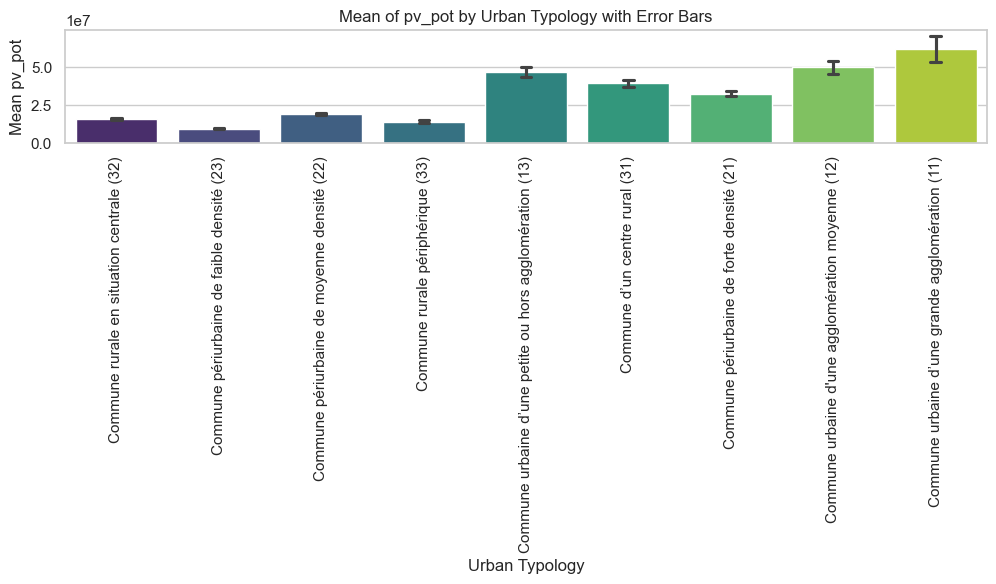

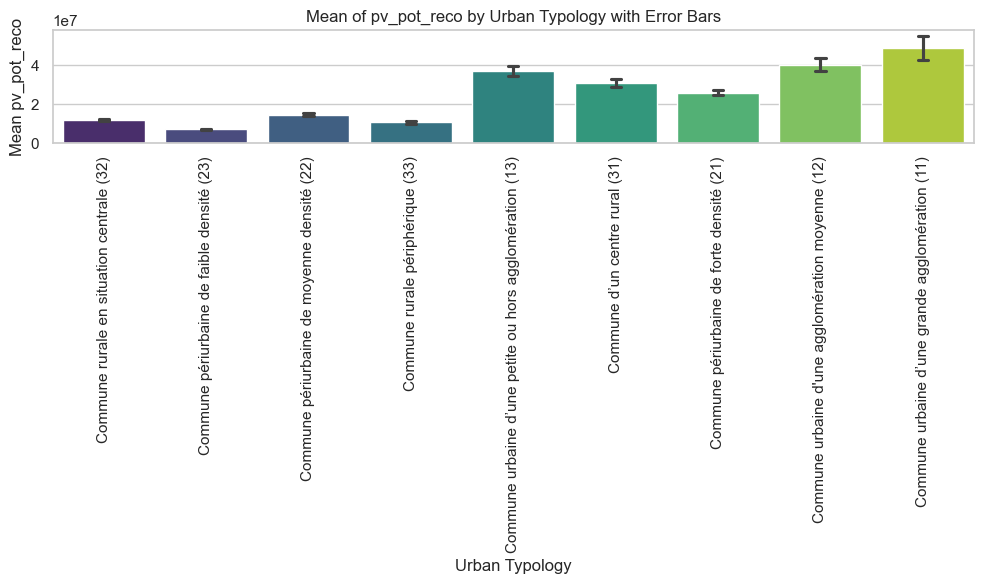

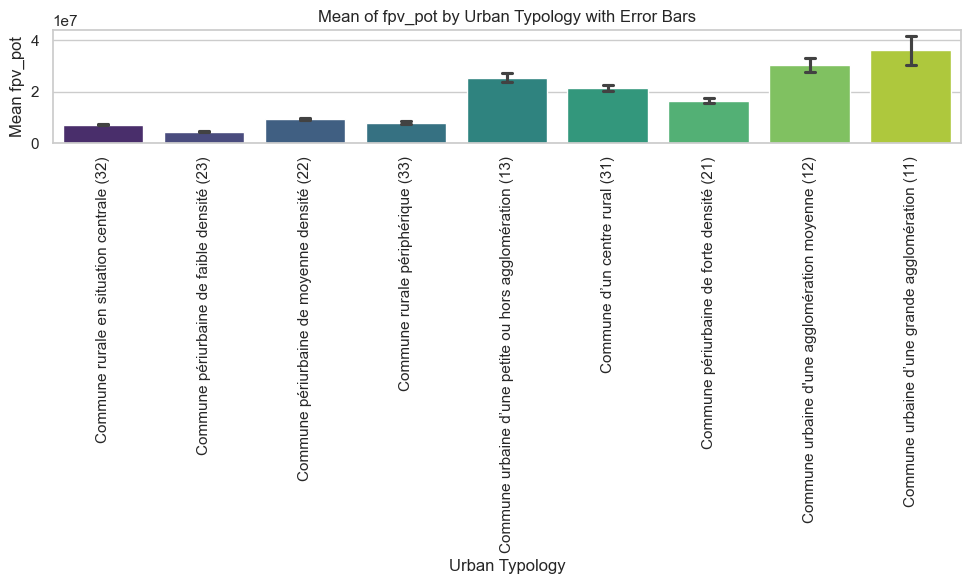

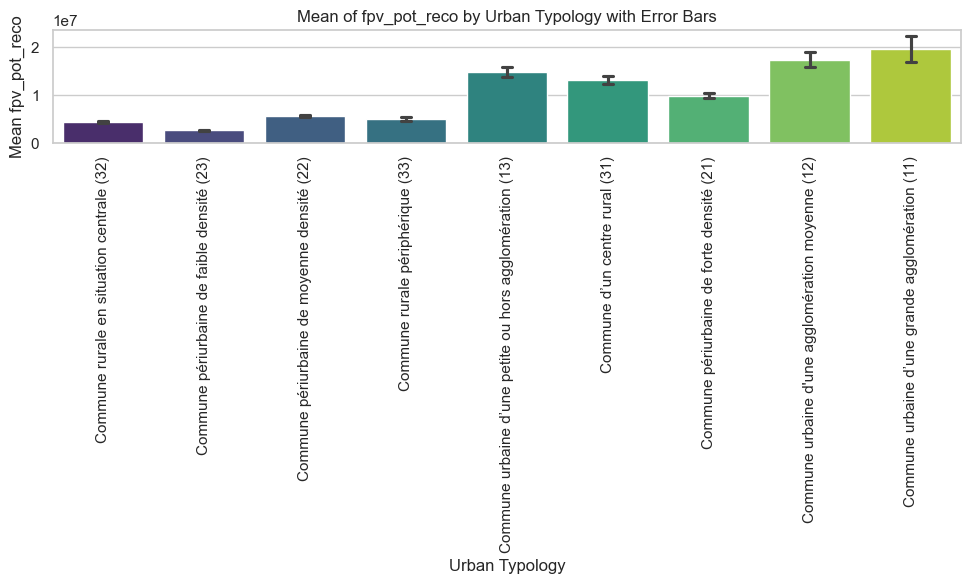

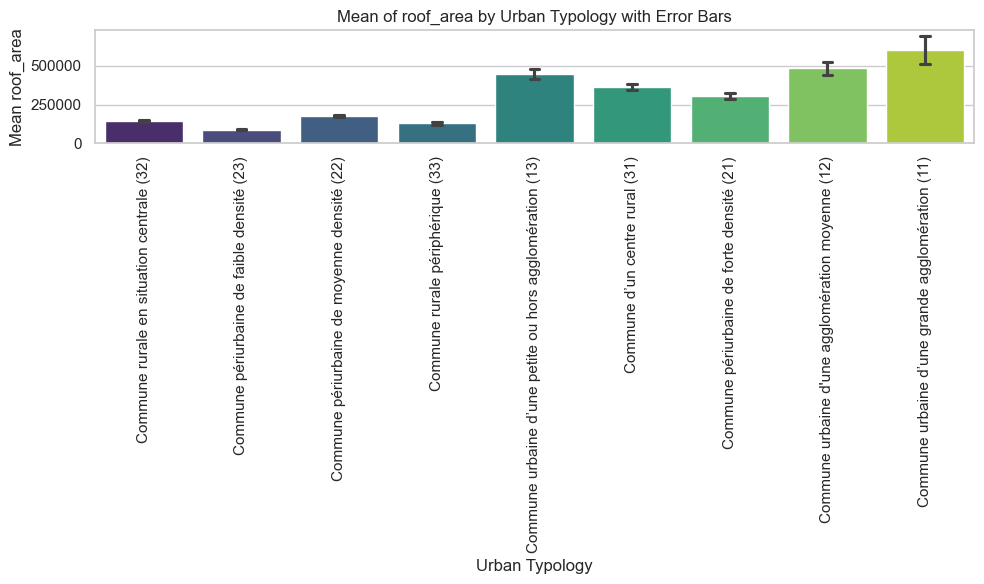

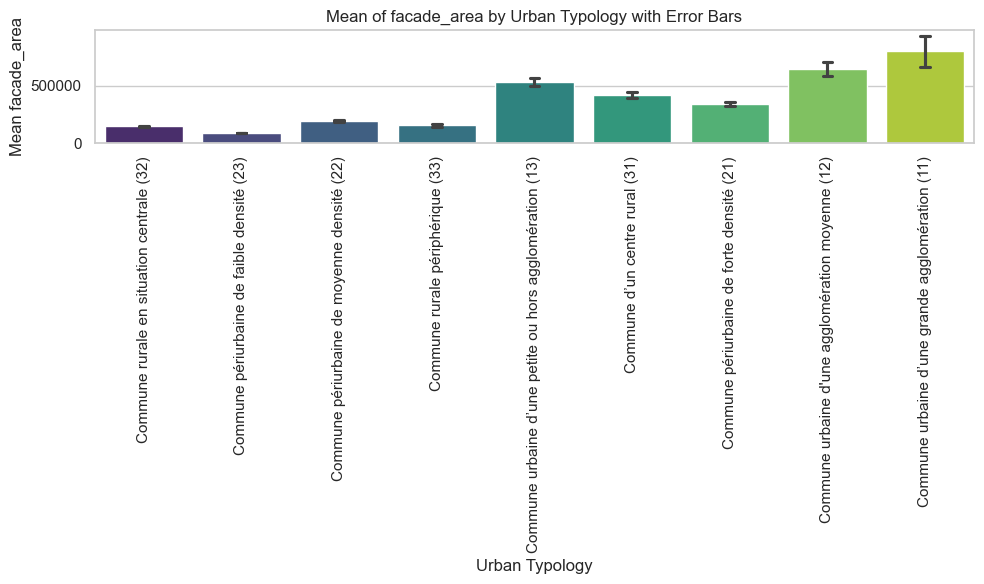

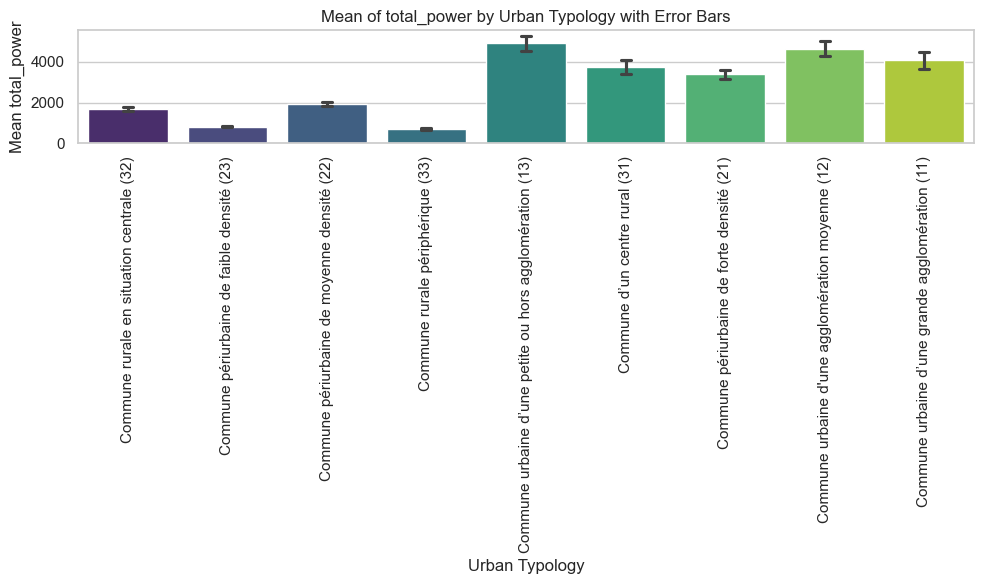

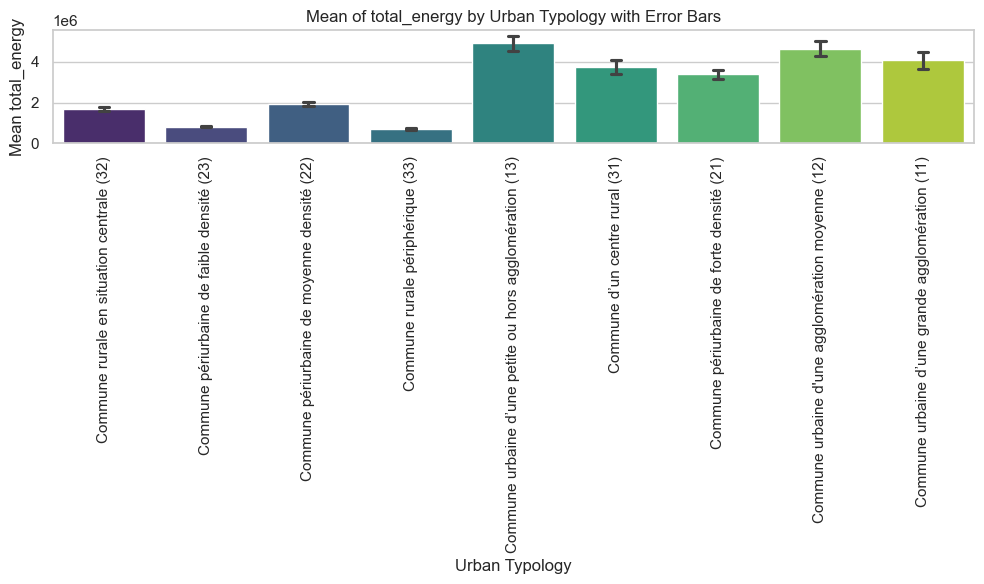

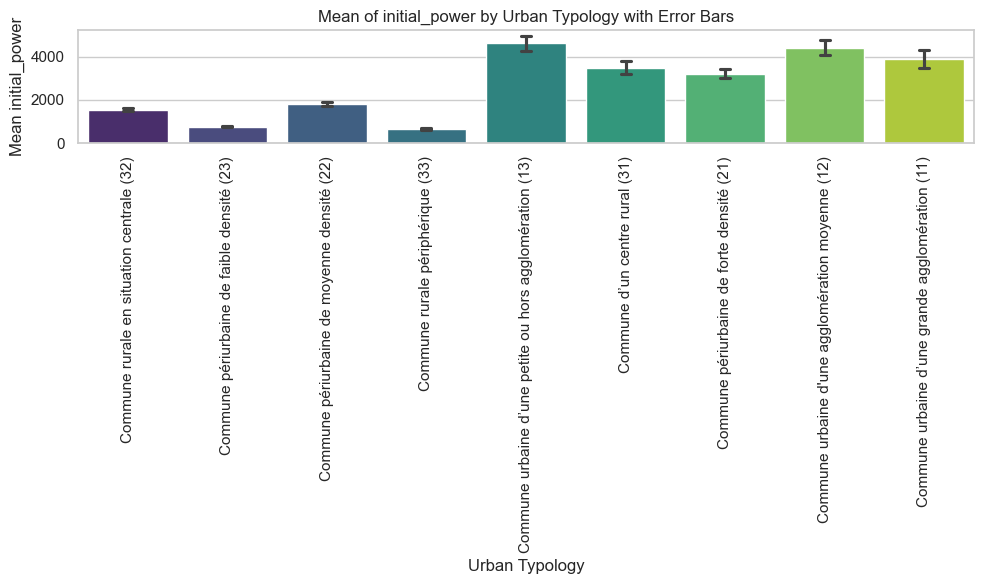

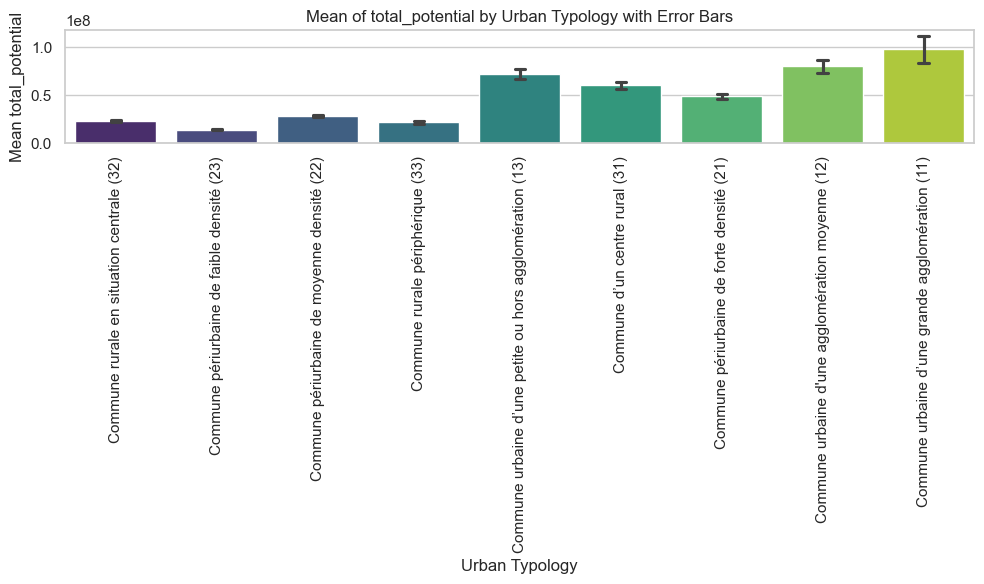

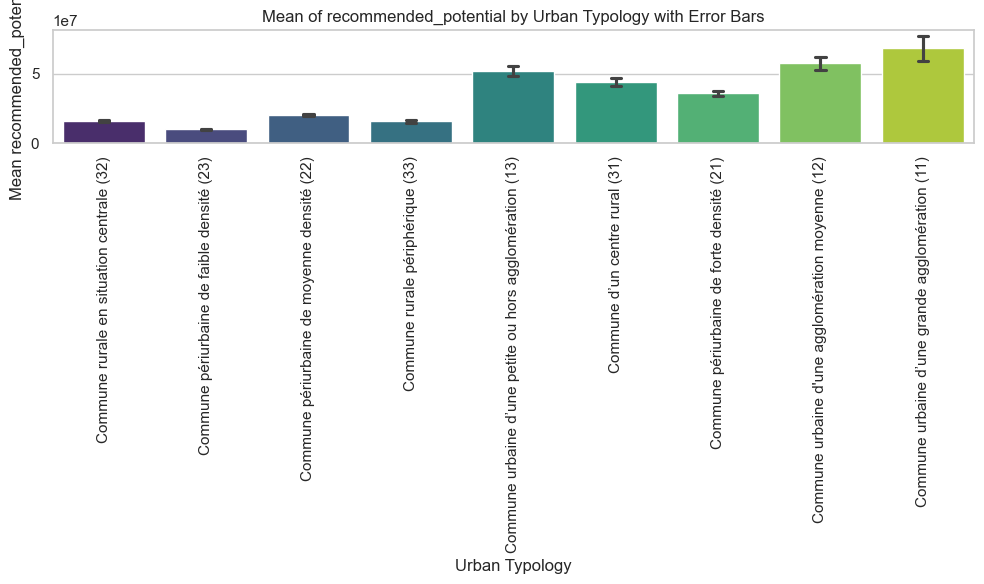

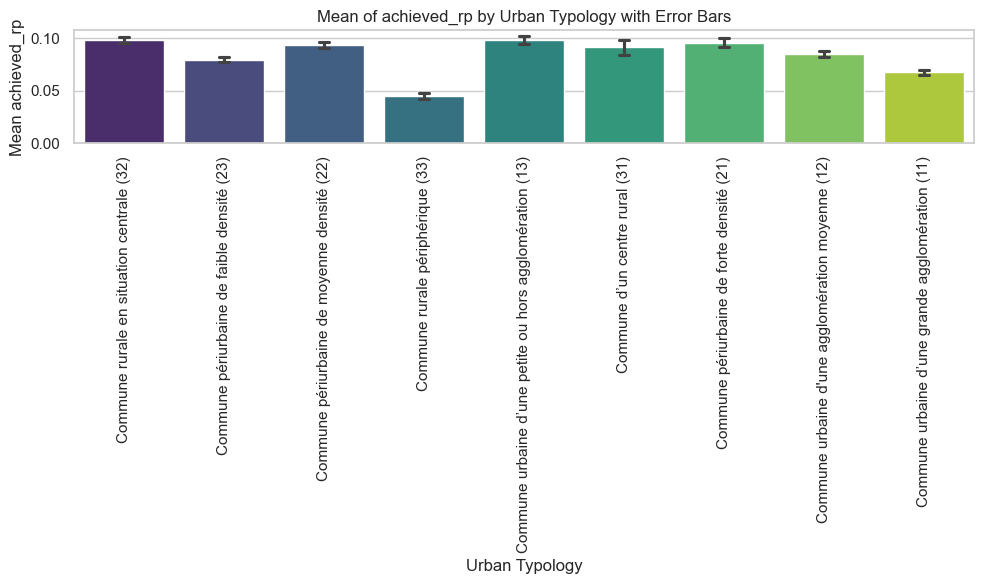

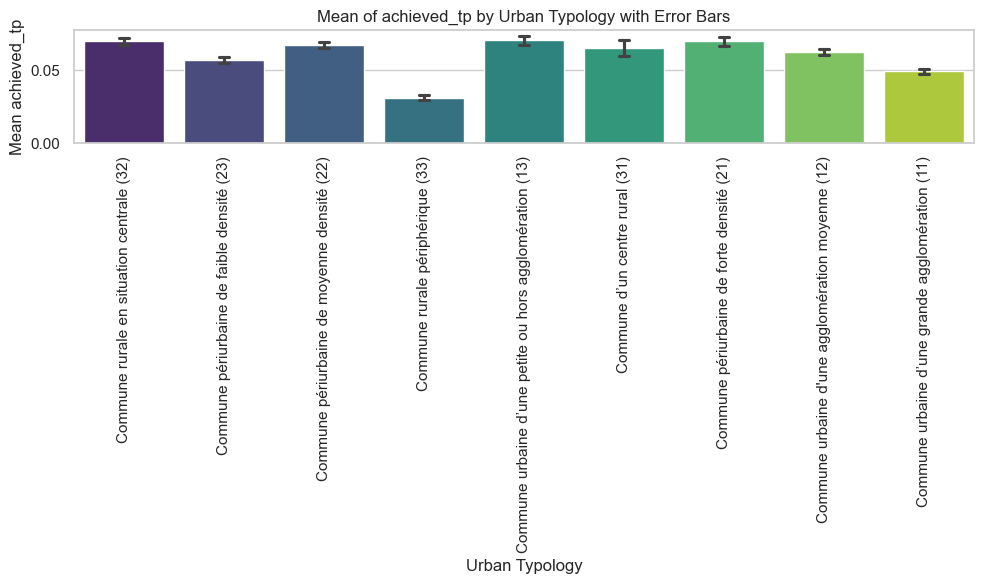

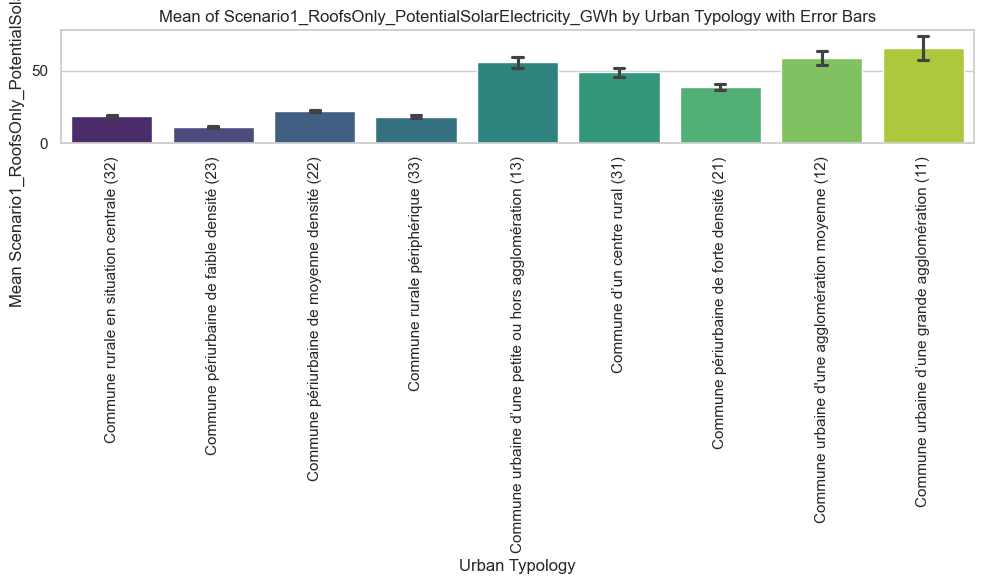

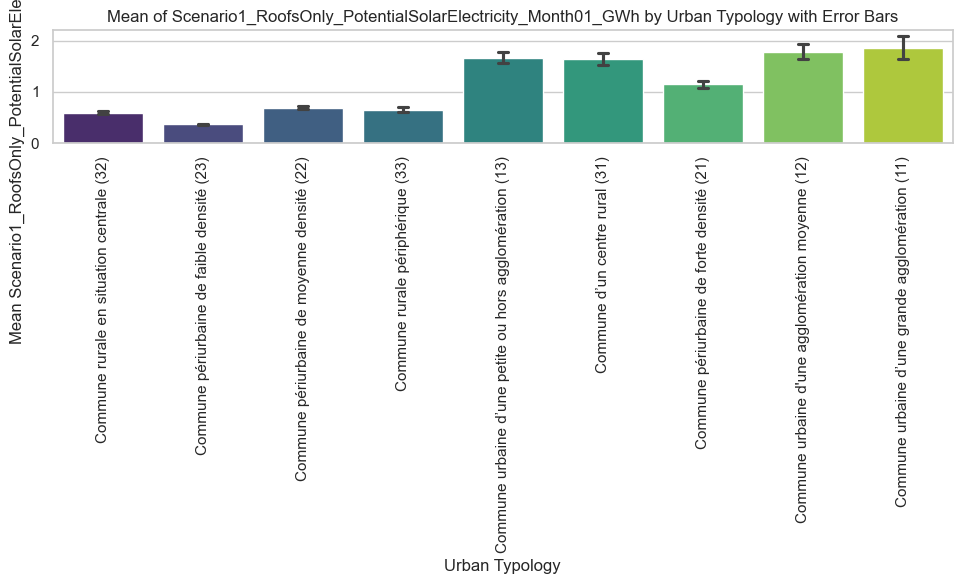

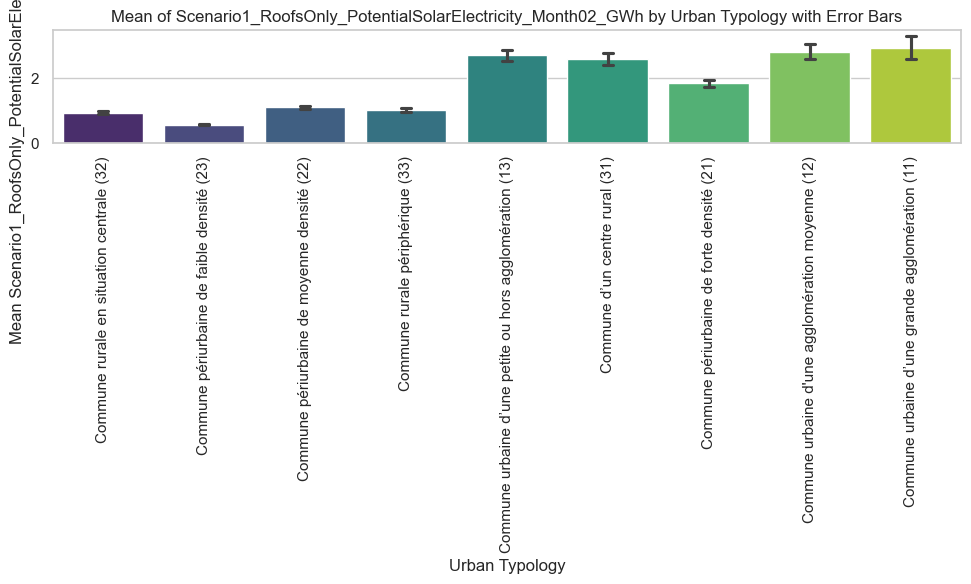

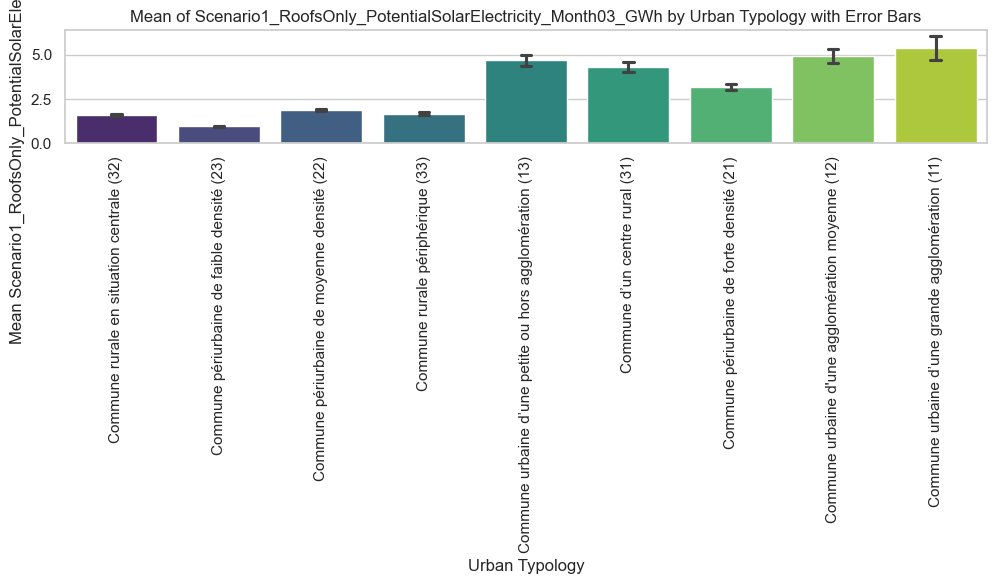

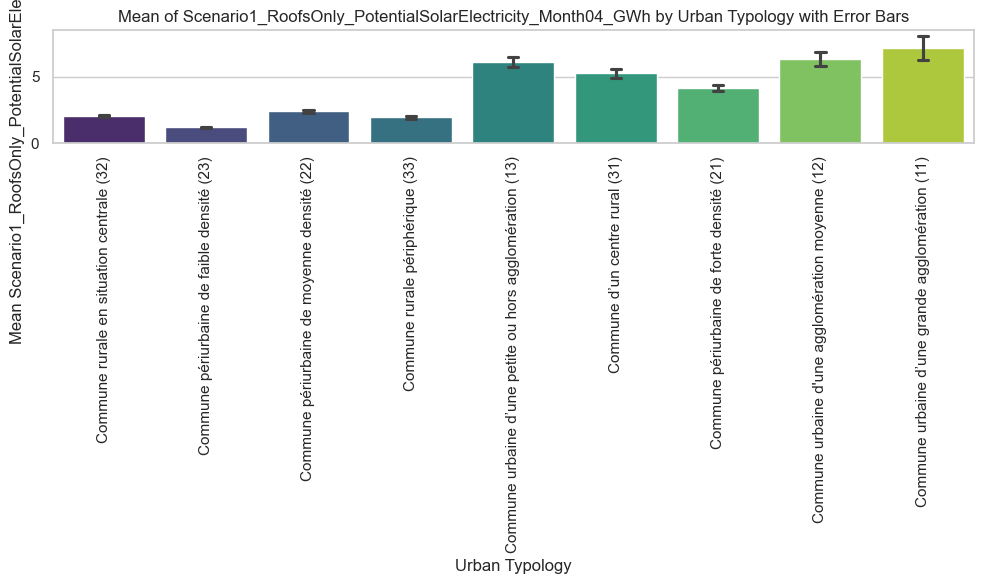

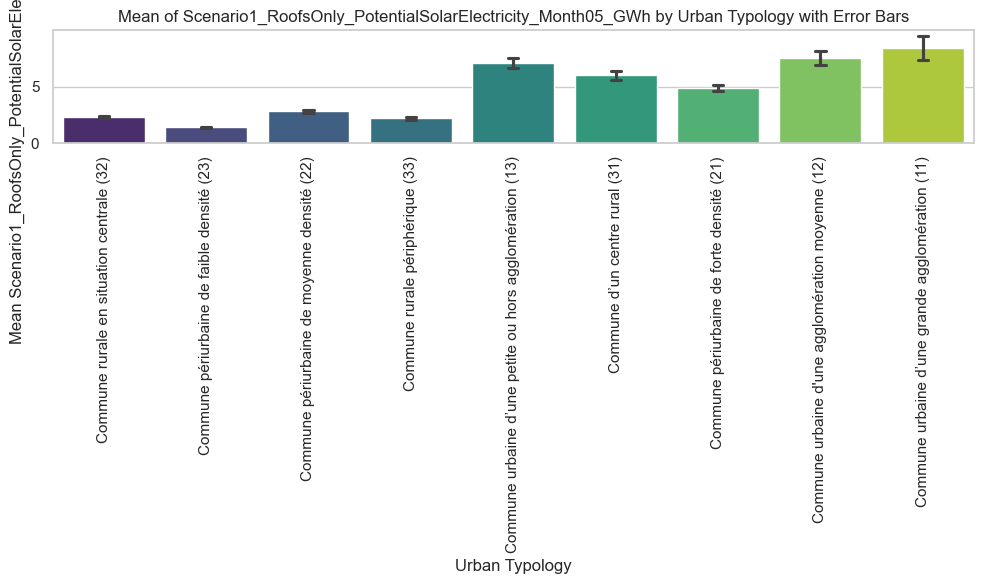

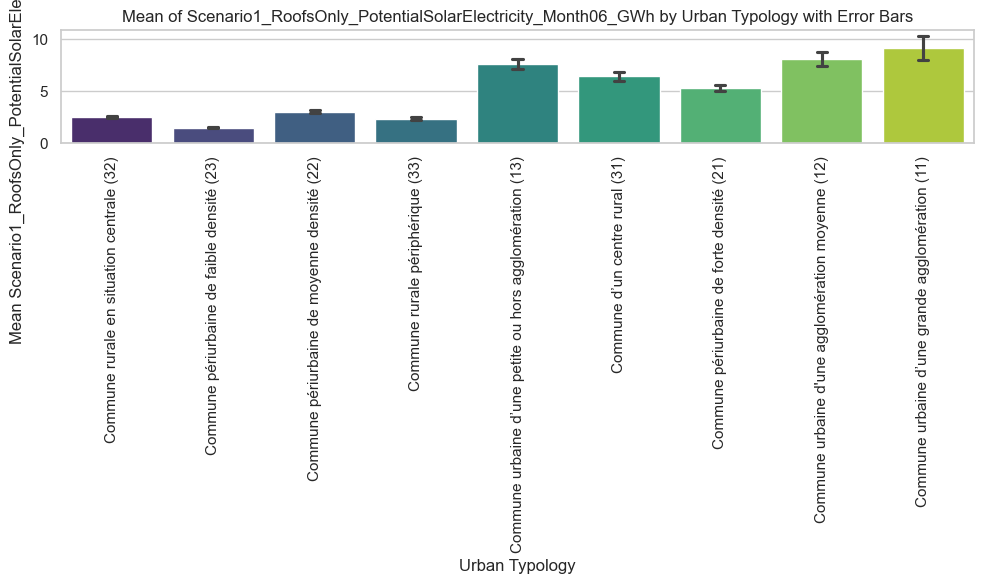

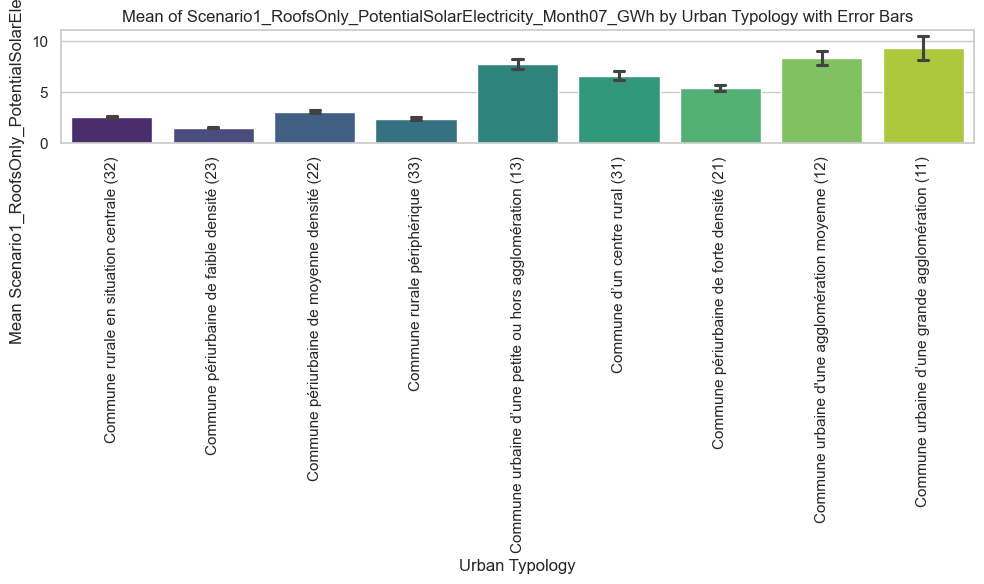

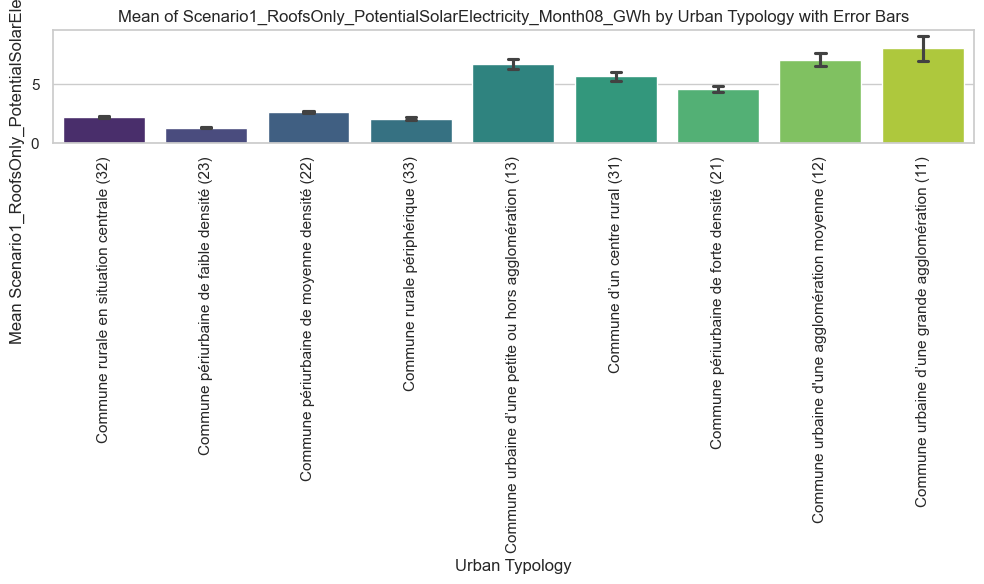

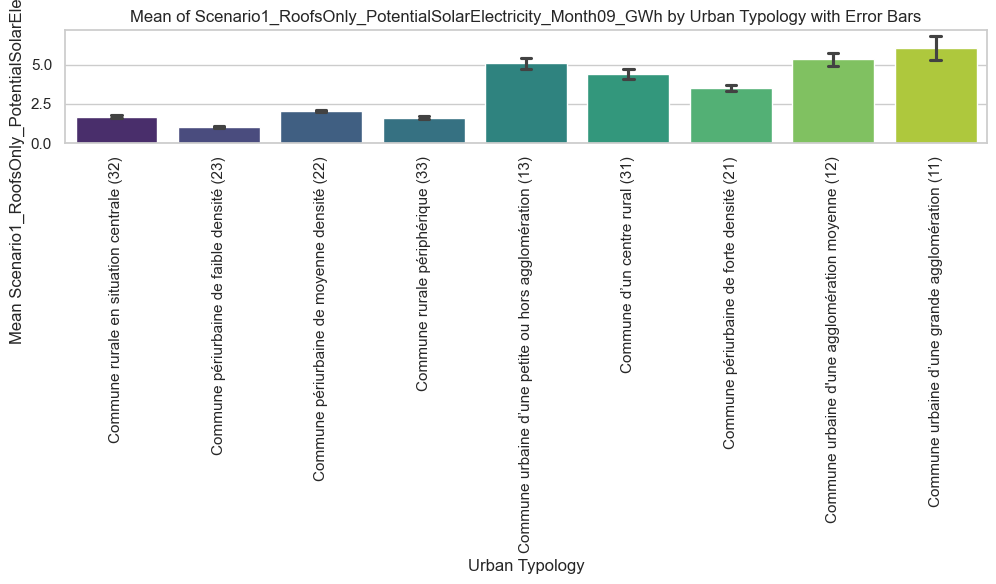

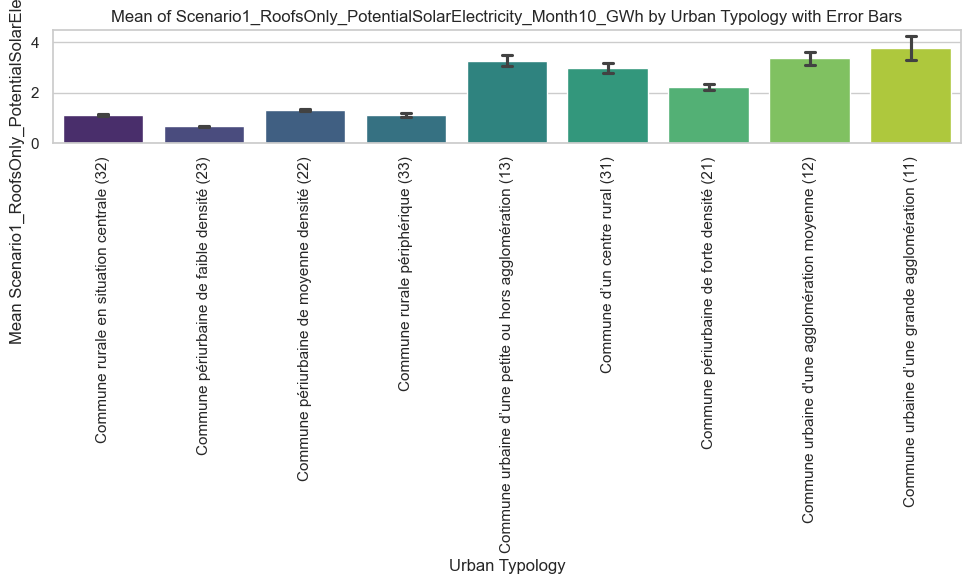

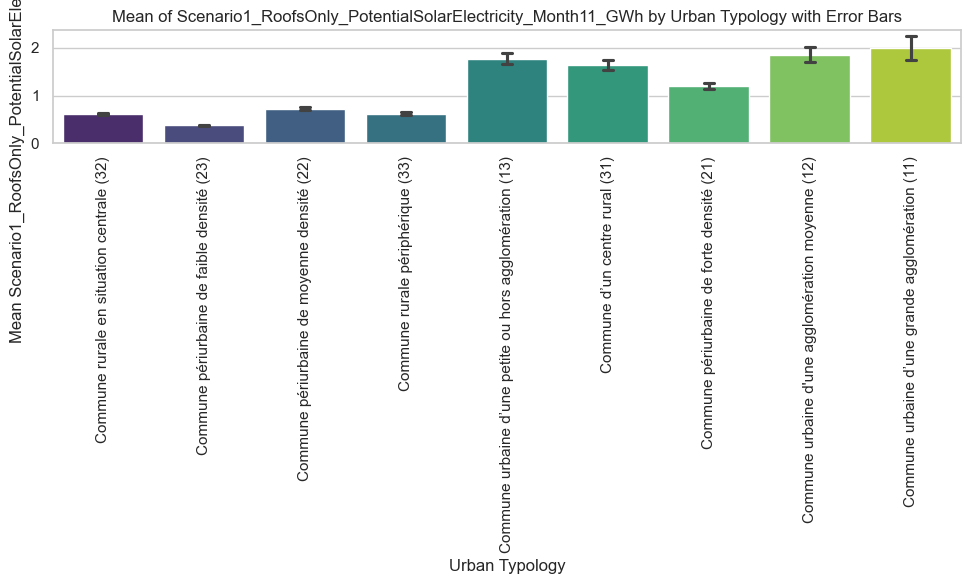

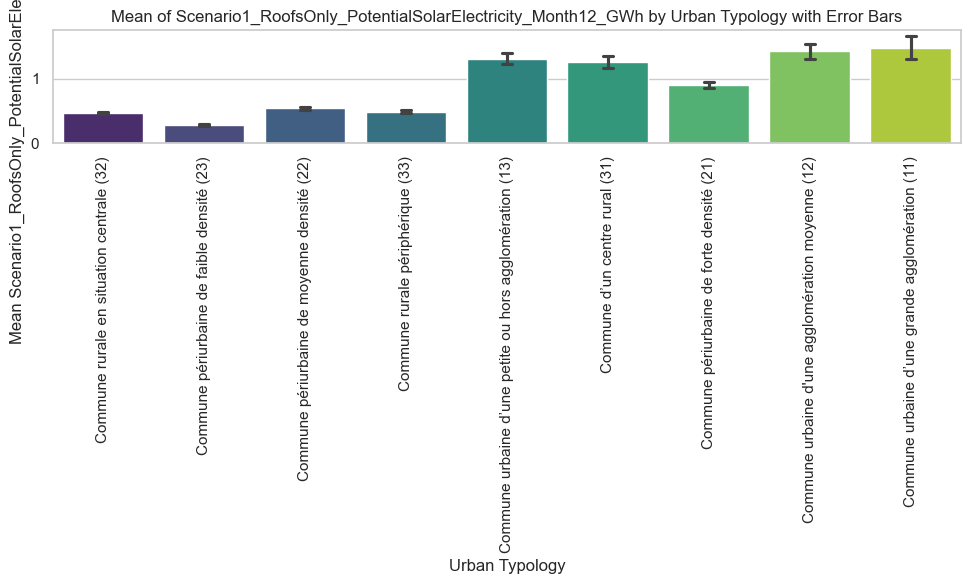

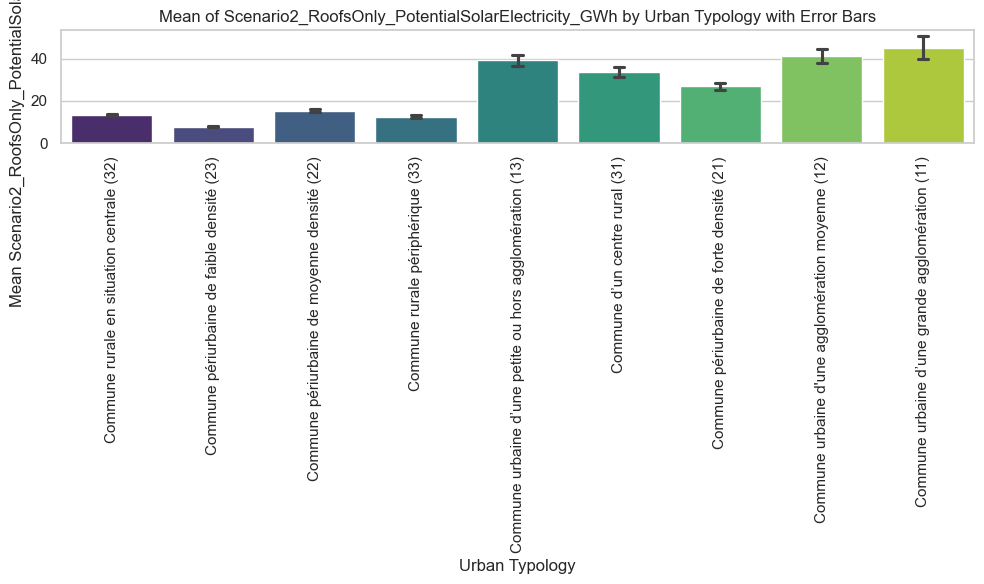

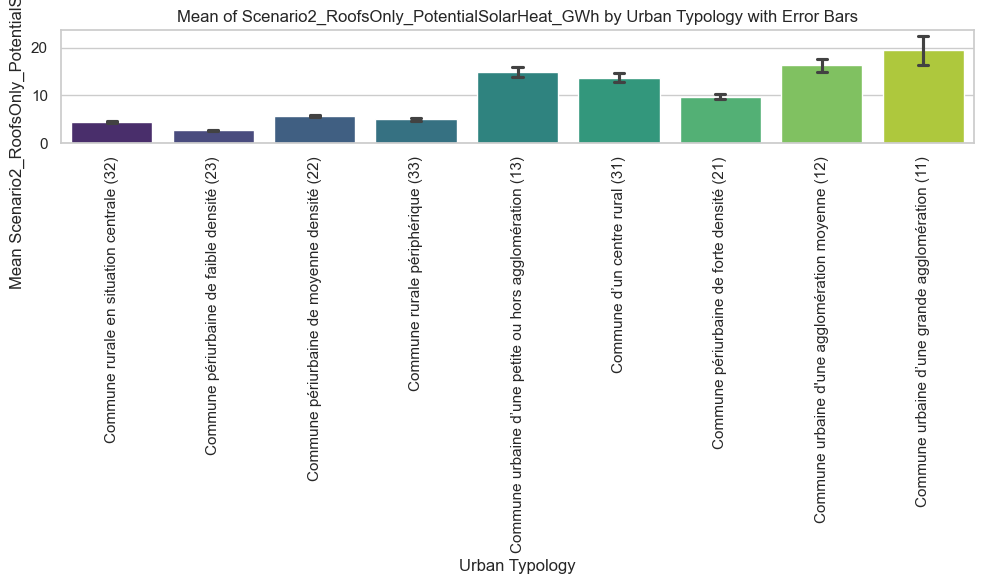

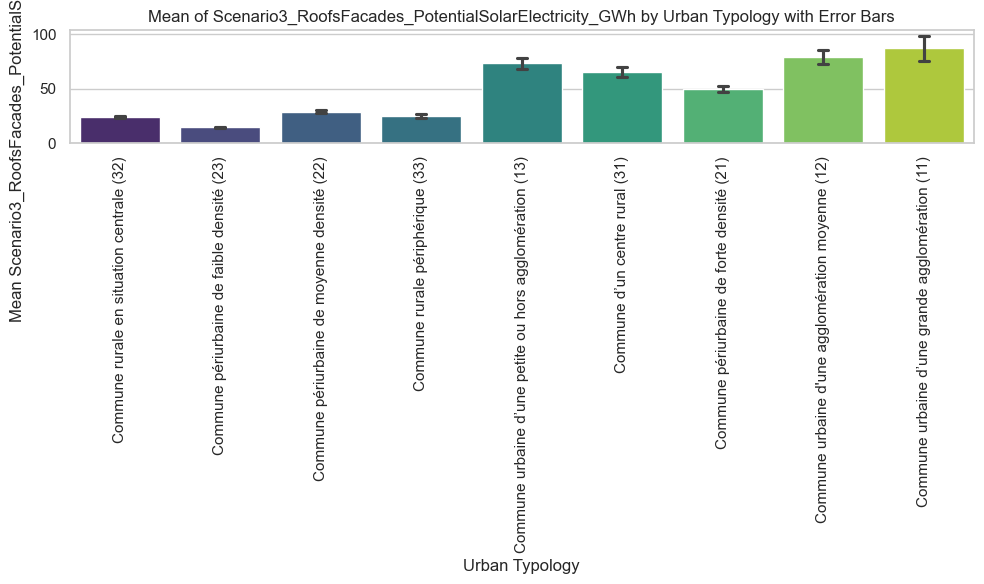

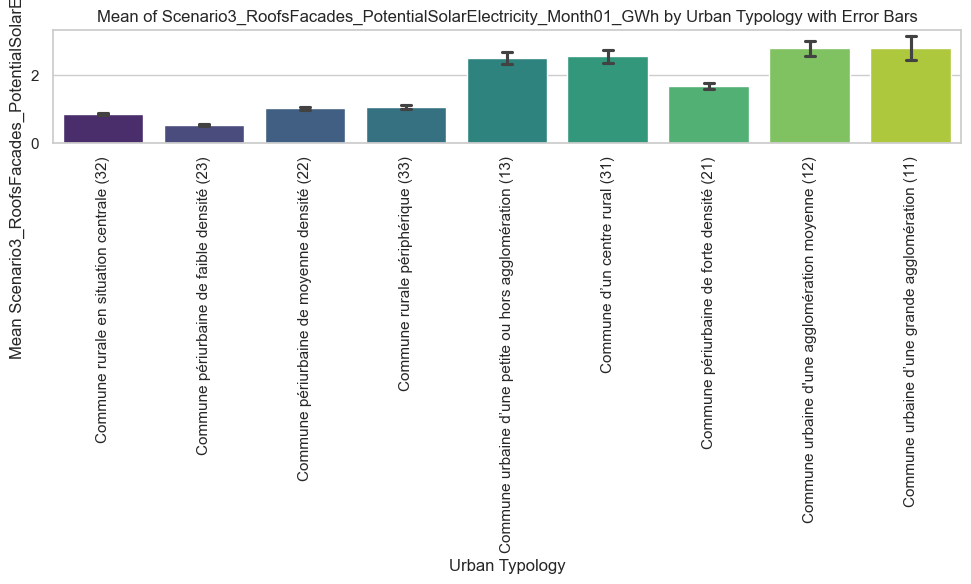

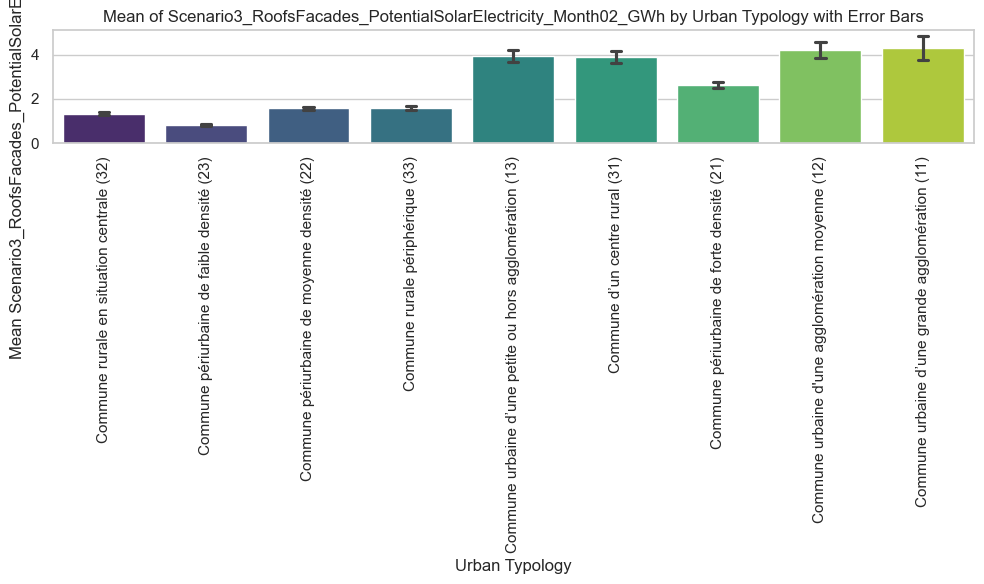

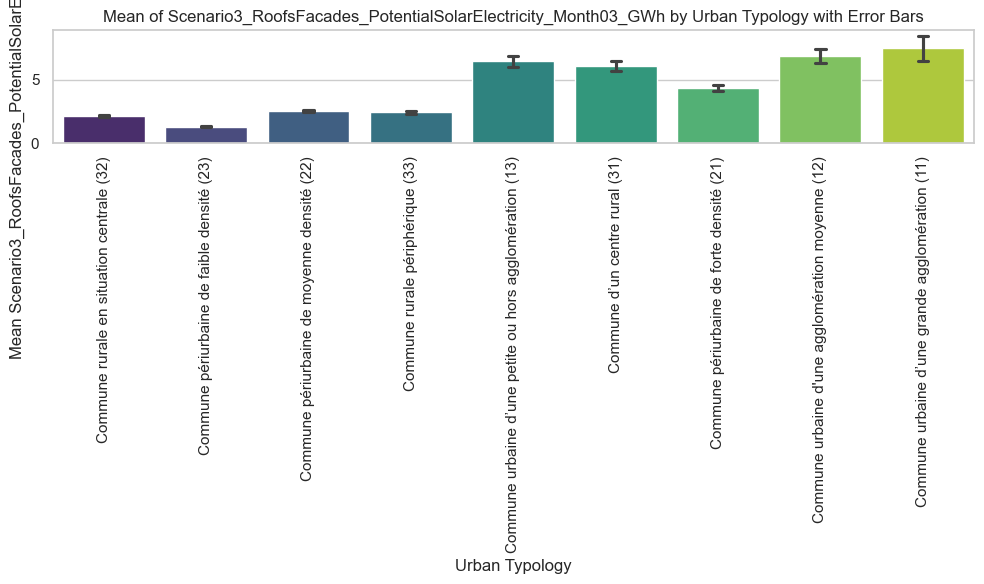

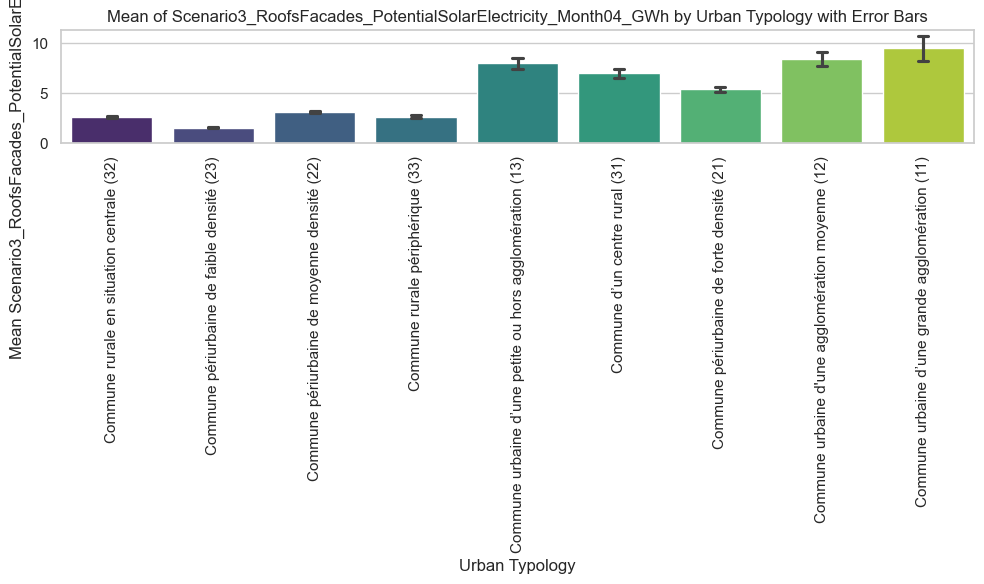

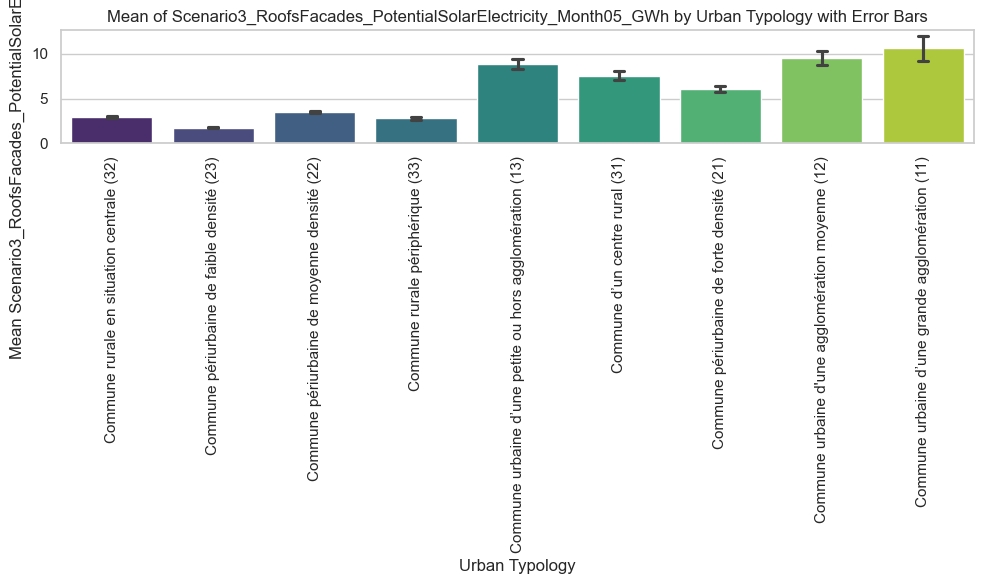

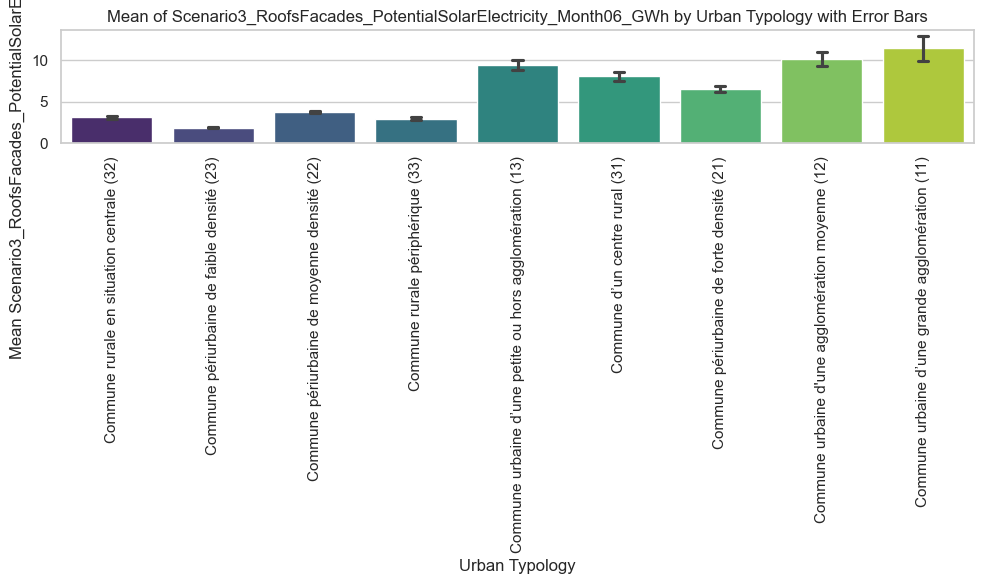

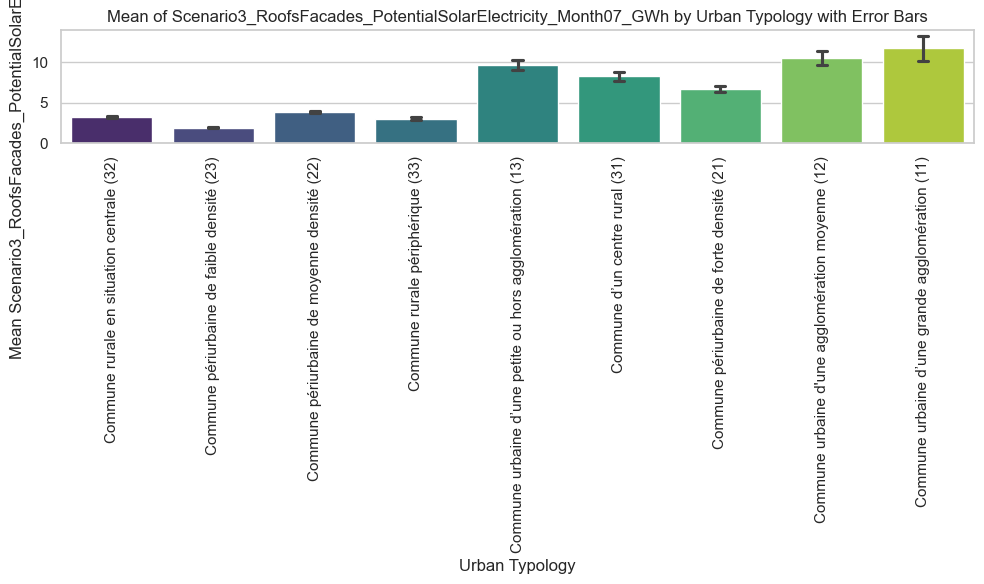

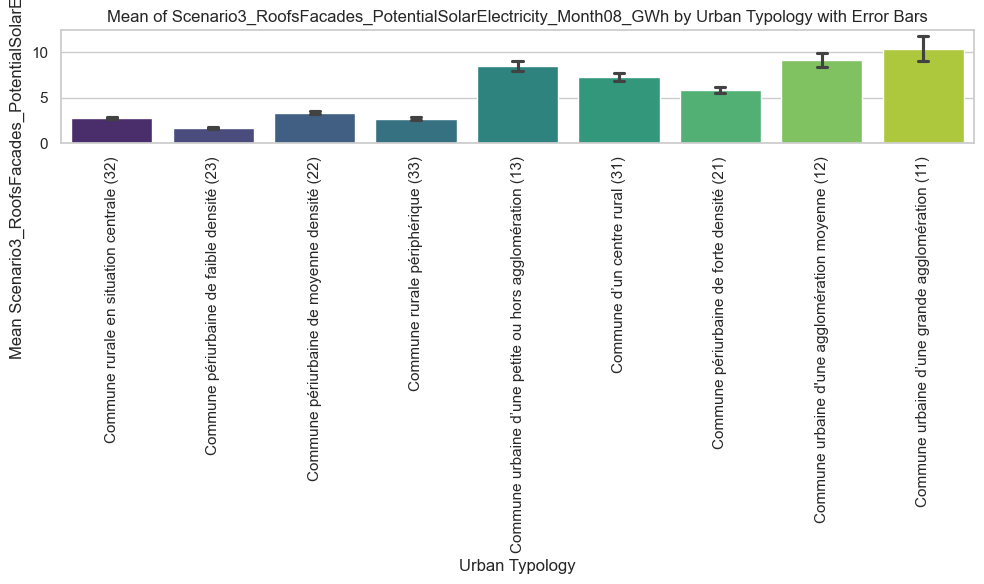

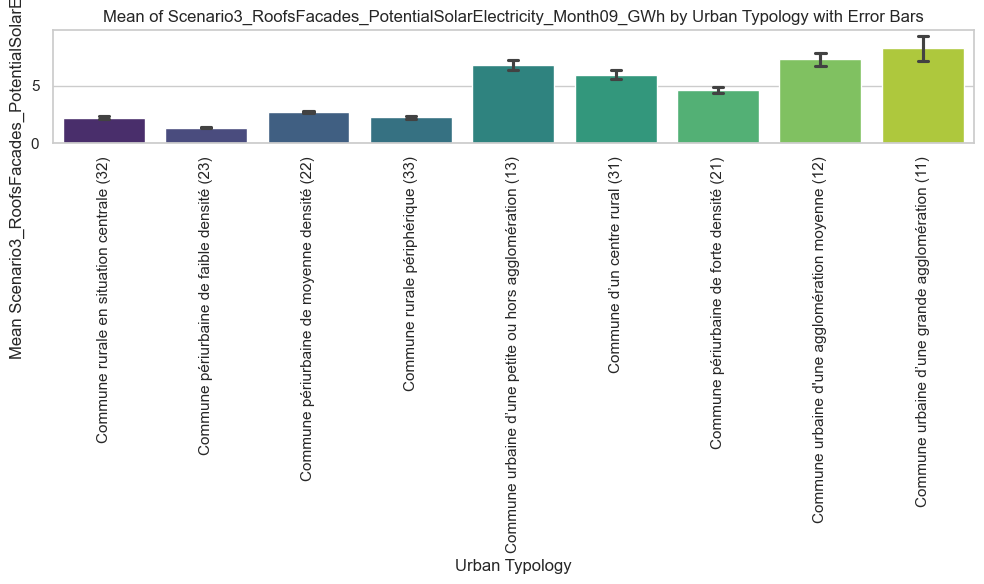

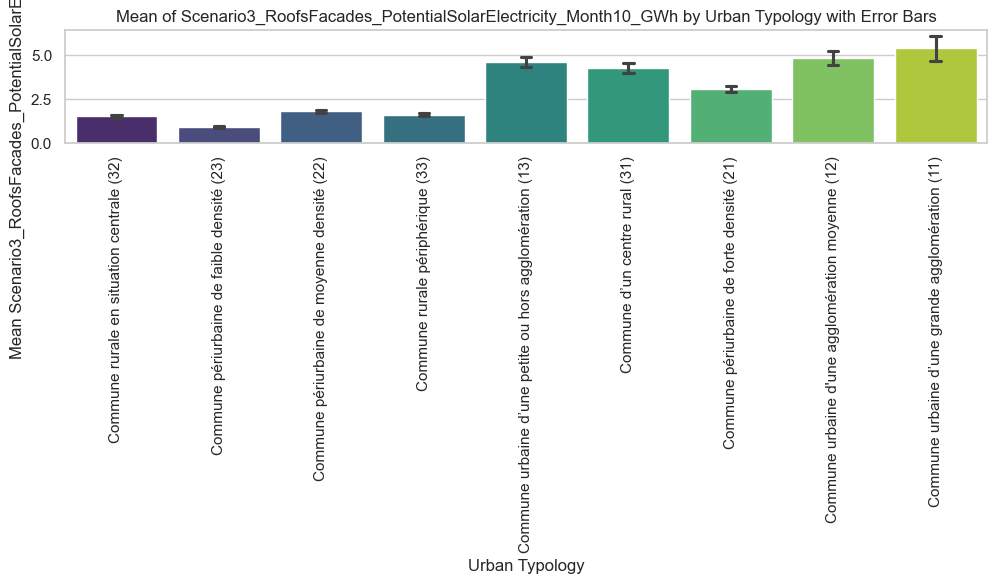

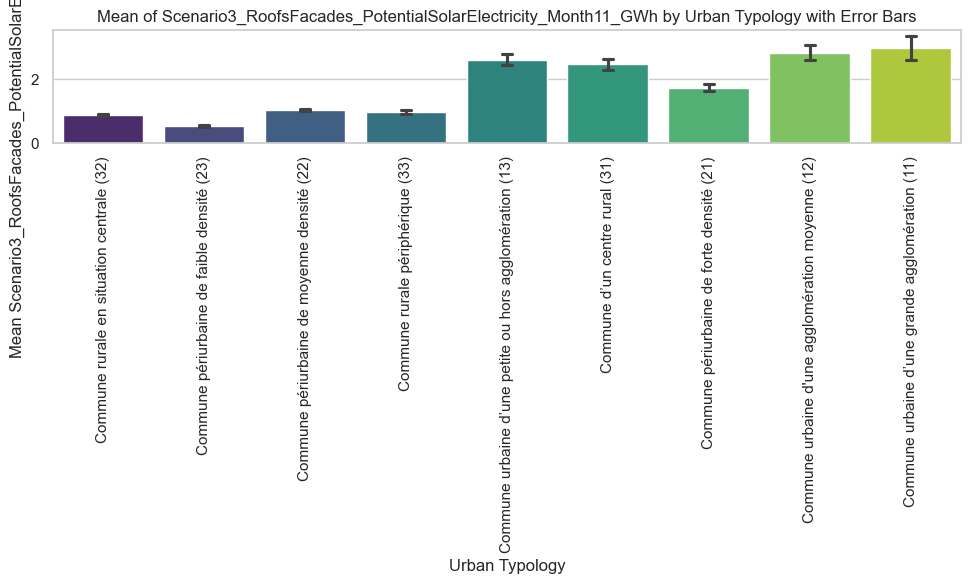

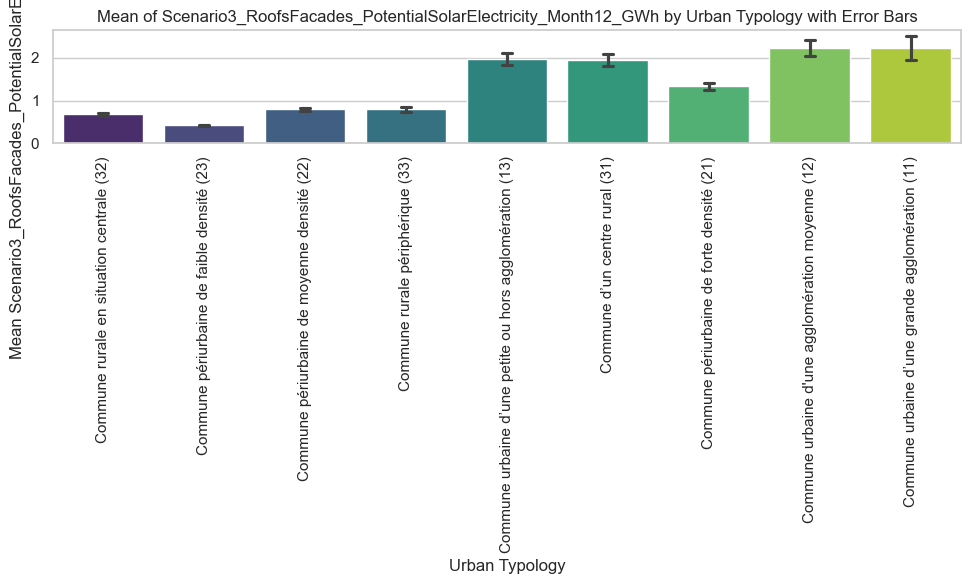

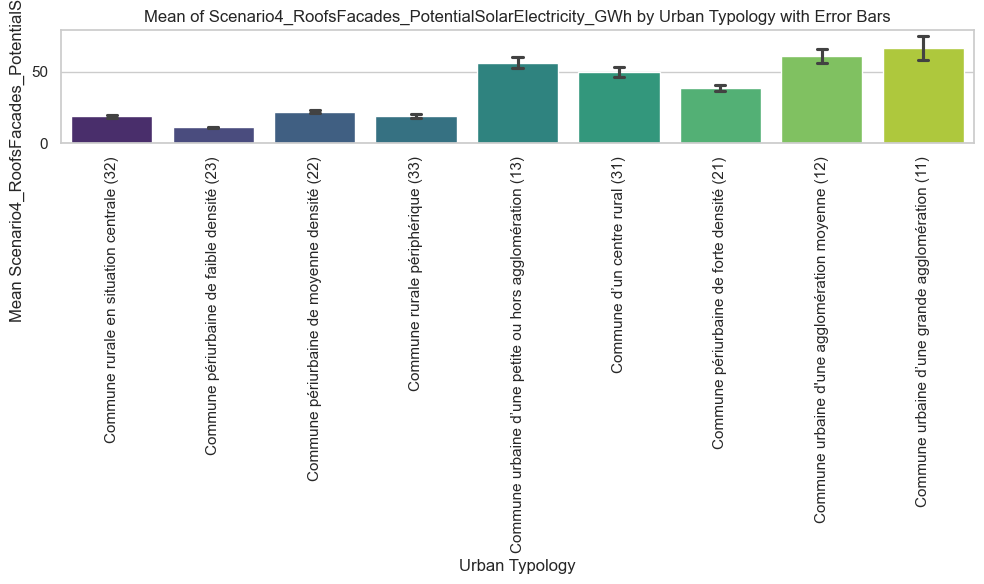

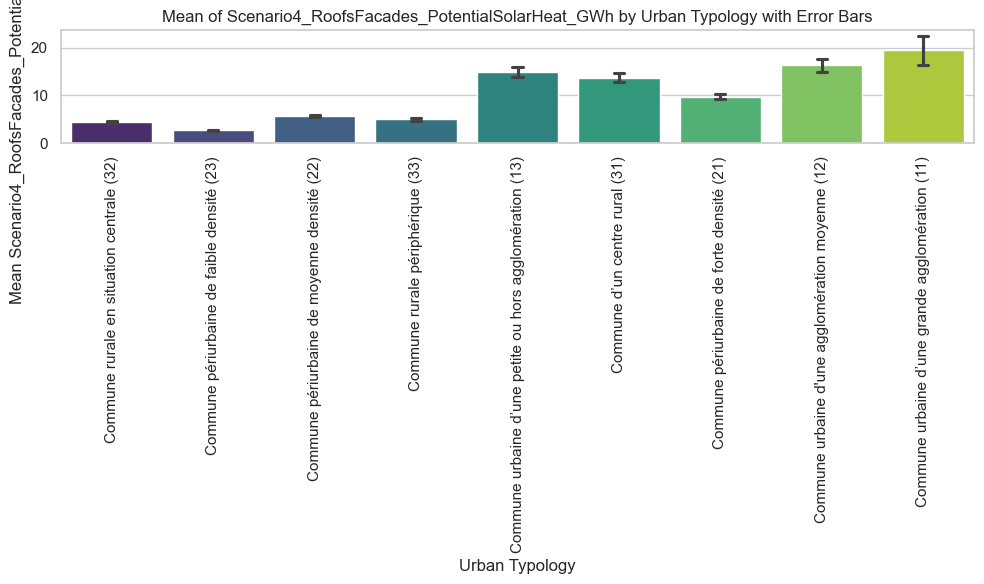

In [315]:
# Melt the DataFrame to long format, selecting only numeric columns
Swiss_solar_potential_df = pd.merge(Swiss_solar_potential_df, urba_df, left_index=True, right_index=True, how='left')
numeric_columns = Swiss_solar_potential_df.select_dtypes(include='number').columns
melted_df = Swiss_solar_potential_df.melt(id_vars="urban_typo", value_vars=numeric_columns, var_name="Variable", value_name="Value")

# Set up the plot size and style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Loop through each unique numeric column to create individual plots
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    # Filter melted DataFrame for the specific column
    col_data = melted_df[melted_df["Variable"] == col]
    
    # Plot with Seaborn, setting `ci="sd"` to use standard deviation as error bars
    sns.barplot(data=col_data, x="urban_typo", y="Value", errorbar="se", capsize=0.1, palette="viridis", hue="urban_typo")

    # Customize the plot
    plt.title(f"Mean of {col} by Urban Typology with Error Bars")
    plt.ylabel(f"Mean {col}")
    plt.xlabel("Urban Typology")
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [306]:
Urban_typo_stats

Population  No canton  \
urban_typo                                                                    
Commune d’un centre rural (31)                       4412.465909  12.397727   
Commune périurbaine de faible densité (23)            928.217090  14.814385   
Commune périurbaine de forte densité (21)            4885.227642  12.341463   
Commune périurbaine de moyenne densité (22)          2446.513369  13.200535   
Commune rurale en situation centrale (32)            1594.184143  11.205656   
Commune rurale périphérique (33)                      984.620853  17.255924   
Commune urbaine d'une agglomération moyenne (12)     9979.519802  15.366337   
Commune urbaine d’une grande agglomération (11)     16120.908046  12.304598   
Commune urbaine d’une petite ou hors agglomérat...   7438.385185  13.918519   

                                                    Electeurs inscrits  \
urban_typo                                                               
Commune d’un centre rural (31)                             2856.136364   
Commune périurbaine de faible densité (23)                  661.027842   
Commune périurbaine de forte densité (21)                  3068.130081   
Commune périurbaine de moyenne densité (22)                1628.735294   
Commune rurale en situation centrale (32)                  1080.012853   
Commune rurale périphérique (33)                            731.279621   
Commune urbaine d'une agglomération moyenne (12)           5955.693069   
Commune urbaine d’une grande agglomération (11)            8729.879310   
Commune urbaine d’une petite ou hors agglomérat...         4437.874074   

                                                    Bulletins rentrés  \
urban_typo                                                              
Commune d’un centre rural (31)                            1161.738636   
Commune périurbaine de faible densité (23)                 297.139211   
Commune périurbaine de forte densité (21)                 1332.471545   
Commune périurbaine de moyenne densité (22)                713.294118   
Commune rurale en situation centrale (32)                  445.534704   
Commune rurale périphérique (33)                           291.791469   
Commune urbaine d'une agglomération moyenne (12)          2532.128713   
Commune urbaine d’une grande agglomération (11)           3907.988506   
Commune urbaine d’une petite ou hors agglomérat...        1820.555556   

                                                    Participation  \
urban_typo                                                          
Commune d’un centre rural (31)                          40.744008   
Commune périurbaine de faible densité (23)              45.963274   
Commune périurbaine de forte densité (21)               43.376822   
Commune périurbaine de moyenne densité (22)             44.254413   
Commune rurale en situation centrale (32)               42.153543   
Commune rurale périphérique (33)                        40.435959   
Commune urbaine d'une agglomération moyenne (12)        42.151519   
Commune urbaine d’une grande agglomération (11)         44.485950   
Commune urbaine d’une petite ou hors agglomérat...      40.734112   

                                                    Bulletins blancs  \
urban_typo                                                             
Commune d’un centre rural (31)                              9.250000   
Commune périurbaine de faible densité (23)                  3.306265   
Commune périurbaine de forte densité (21)                  11.983740   
Commune périurbaine de moyenne densité (22)                 5.919786   
Commune rurale en situation centrale (32)                   3.295630   
Commune rurale périphérique (33)                            2.464455   
Commune urbaine d'une agglomération moyenne (12)           28.678218   
Commune urbaine d’une grande agglomération (11)            35.839080   
Commune urbaine d’une petite ou hors agglomérat...         12.859259   

            

In [241]:
swiss_communes_fusion = {
    "Blonay - Saint-Légier": ["Blonay", "Saint-Légier-La Chiésaz"],
    "Böztal": ["Bözen", "Effingen", "Elfingen", "Hornussen"],
    "Damphreux-Lugnez": ["Damphreux", "Lugnez"],
    "Hautemorges": ["Apples", "Bussy-Chardonney", "Cottens", "Échichens", "Monnaz", "Reverolle", "Saint-Livres", "Sévery"],
    "Herznach-Ueken": ["Herznach", "Ueken"],
    "Schwende-Rüte": ["Schwende", "Rüte"],
    "Tresa": ["Croglio", "Monteggio", "Ponte Tresa", "Sessa"],
    "Val Mara": ["Maroggia", "Melano", "Rovio"],
    "Verzasca": ["Brione (Verzasca)", "Corippo", "Frasco", "Sonogno", "Vogorno"],
    "Zurzach": ["Bad Zurzach", "Baldingen", "Böbikon", "Kaiserstuhl", "Rekingen", "Rietheim", "Wislikofen"],
    "Basse-Vendline": ["Bonfol", "Beurnevésin"],
    "Buchegg":["Lüterswil-Gächliwil"], 
    "Reutigen": ["Zwieselberg"],
    "Baden":["Turgi"], 
    "Wangen an der Aare":["Wangenried"]
}

In [243]:
Municipal_df.loc[list(swiss_communes_fusion.keys())]["mun_id"].values

array([5892, 4185, 6811, 5656, 4186, 3112, 5239, 5240, 5399, 4324, 6812,
       2465,  767, 4021,  992], dtype=int64)